In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:


base_dir = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset"

if os.path.exists(base_dir):
    print("✅ Found preprocessed_dataset folder")
    print("📁 Subfolders inside it:")
    print(os.listdir(base_dir))
    
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')

    if os.path.exists(train_dir):
        print(f"✅ 'train' folder found with {len(os.listdir(train_dir))} classes")
    else:
        print("❌ 'train' folder NOT found!")

    if os.path.exists(test_dir):
        print(f"✅ 'test' folder found with {len(os.listdir(test_dir))} classes")
    else:
        print("❌ 'test' folder NOT found!")
else:
    print("❌ preprocessed_dataset folder NOT found! Check path again.")


✅ Found preprocessed_dataset folder
📁 Subfolders inside it:
['test', 'train']
✅ 'train' folder found with 83 classes
✅ 'test' folder found with 83 classes


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 25087 images belonging to 83 classes.
Found 6271 images belonging to 83 classes.


In [4]:
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 83)                  │          10,707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,179,667 (42.65 MB)

 Trainable params: 11,179,667 (42.65 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# 🏋️ Train the CNN Model (Improved)
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,   # You can increase epochs later (e.g., 20–30) for better results
    verbose=1
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
388/784 ━━━━━━━━━━━━━━━━━━━━ 5:39 858ms/step - accuracy: 0.0713 - loss: 4.1022

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


784/784 ━━━━━━━━━━━━━━━━━━━━ 780s 993ms/step - accuracy: 0.1058 - loss: 3.9445 - val_accuracy: 0.3224 - val_loss: 2.9874
Epoch 2/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 1944s 2s/step - accuracy: 0.2556 - loss: 3.2333 - val_accuracy: 0.4026 - val_loss: 2.7386
Epoch 3/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 863s 1s/step - accuracy: 0.3229 - loss: 2.9037 - val_accuracy: 0.4502 - val_loss: 2.4310
Epoch 4/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 874s 1s/step - accuracy: 0.3705 - loss: 2.6708 - val_accuracy: 0.4706 - val_loss: 2.4000
Epoch 5/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 868s 1s/step - accuracy: 0.4008 - loss: 2.5107 - val_accuracy: 0.5108 - val_loss: 2.1621
Epoch 6/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 867s 1s/step - accuracy: 0.4261 - loss: 2.3574 - val_accuracy: 0.5266 - val_loss: 2.0918
Epoch 7/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 4384s 6s/step - accuracy: 0.4582 - loss: 2.1883 - val_accuracy: 0.5328 - val_loss: 1.9894
Epoch 8/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 769s 980ms/step - accuracy: 0.4788 - loss: 2.0850 - val_accurac

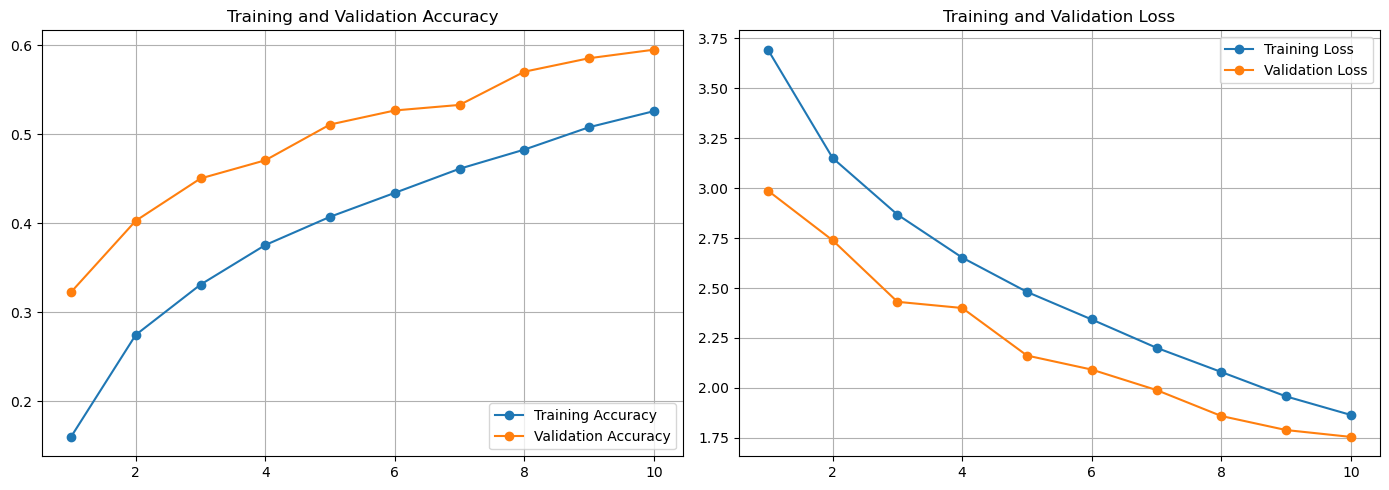

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss from history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', marker='o')
    plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function
plot_training_history(history)


## 🔎 Day 6 Part 1: Evaluation and Prediction (Restart-Safe)


In [19]:
# 📦 Save the trained model after training (Add to end of Day 5)
model.save("saved_models/final_model_day5.h5")
print("✅ Model saved as 'saved_models/final_model_day5.h5'")


✅ Model saved as 'saved_models/final_model_day5.h5'


Found 6271 images belonging to 83 classes.


✅ Model loaded successfully.
196/196 ━━━━━━━━━━━━━━━━━━━━ 99s 501ms/step - accuracy: 0.6028 - loss: 1.7176

✅ Final Test Accuracy: 0.5948
✅ Final Test Loss: 1.7549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


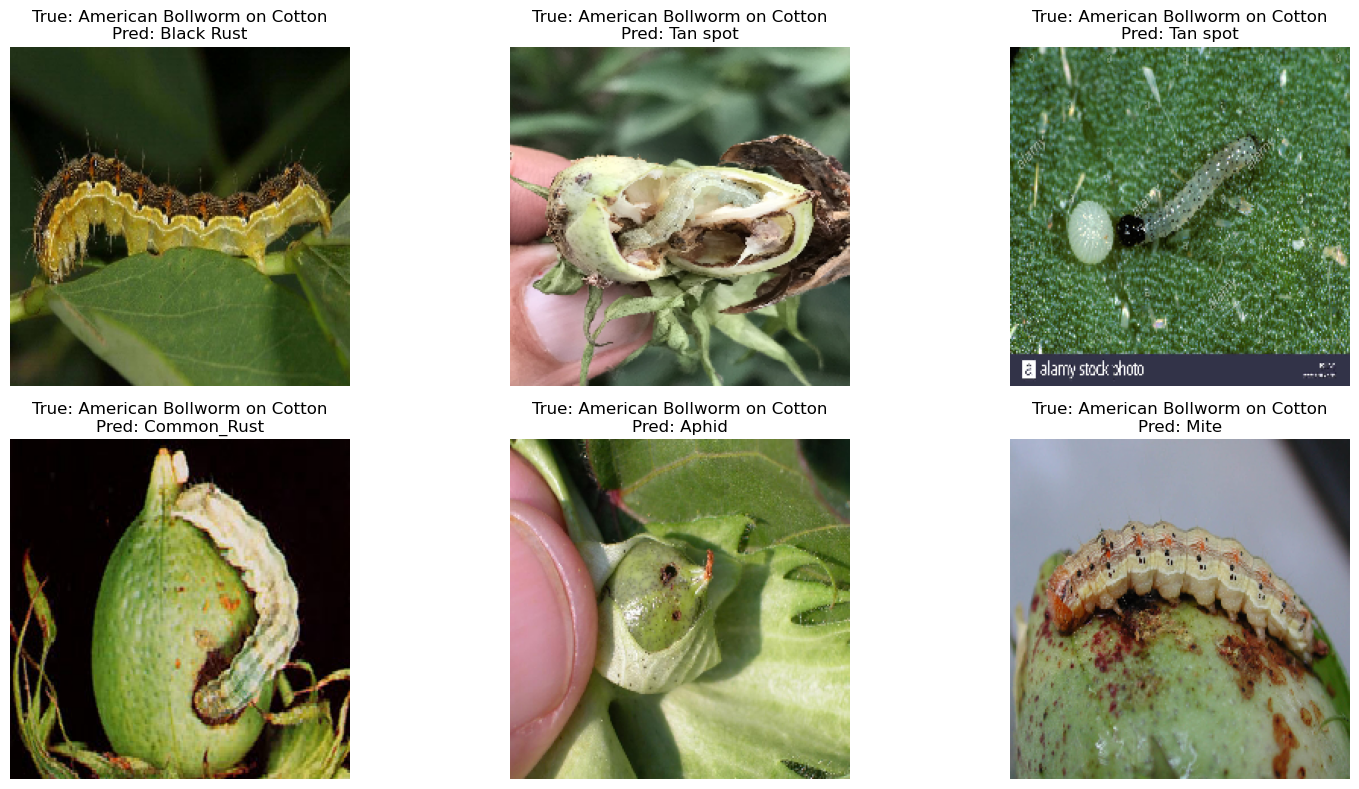

✅ Model also saved as 'final_model_day6.h5'


In [20]:
# ✅ Day 6 - Part 1: Evaluation and Prediction (Safe to Run After Restart)

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ⚙️ Setup test generator (safe if kernel restarted)
base_dir = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset"
test_dir = os.path.join(base_dir, 'test')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ✅ Load the model
model = load_model("saved_models/final_model_day5.h5")
print("✅ Model loaded successfully.")

# ✅ Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n✅ Final Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Final Test Loss: {test_loss:.4f}")

# ✅ Predict and visualize sample results
class_labels = list(test_generator.class_indices.keys())
images, labels = next(test_generator)
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

plt.figure(figsize=(16, 8))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# ✅ Save again as Day 6 checkpoint (optional)
model.save("saved_models/final_model_day6.h5")
print("✅ Model also saved as 'final_model_day6.h5'")


196/196 ━━━━━━━━━━━━━━━━━━━━ 91s 464ms/step

📋 Classification Report:
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.00      0.00      0.00         8
      Anthracnose on Cotton       0.00      0.00      0.00         8
                      Aphid       0.24      0.33      0.28       177
            Apple_Scab_Leaf       0.00      0.00      0.00        16
                 Apple_leaf       0.11      0.06      0.07        18
            Apple_rust_leaf       0.00      0.00      0.00        24
                  Army worm       0.00      0.00      0.00         5
   Becterial Blight in Rice       0.78      0.87      0.82       326
           Bell_pepper_leaf       0.00      0.00      0.00        15
      Bell_pepper_leaf_spot       0.00      0.00      0.00        19
                 Black Rust       0.46      0.29      0.35       118
                      Blast       0.56      0.75      0.64       121
             Blueberry_leaf     

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\AppData\Local\Temp\ipyker

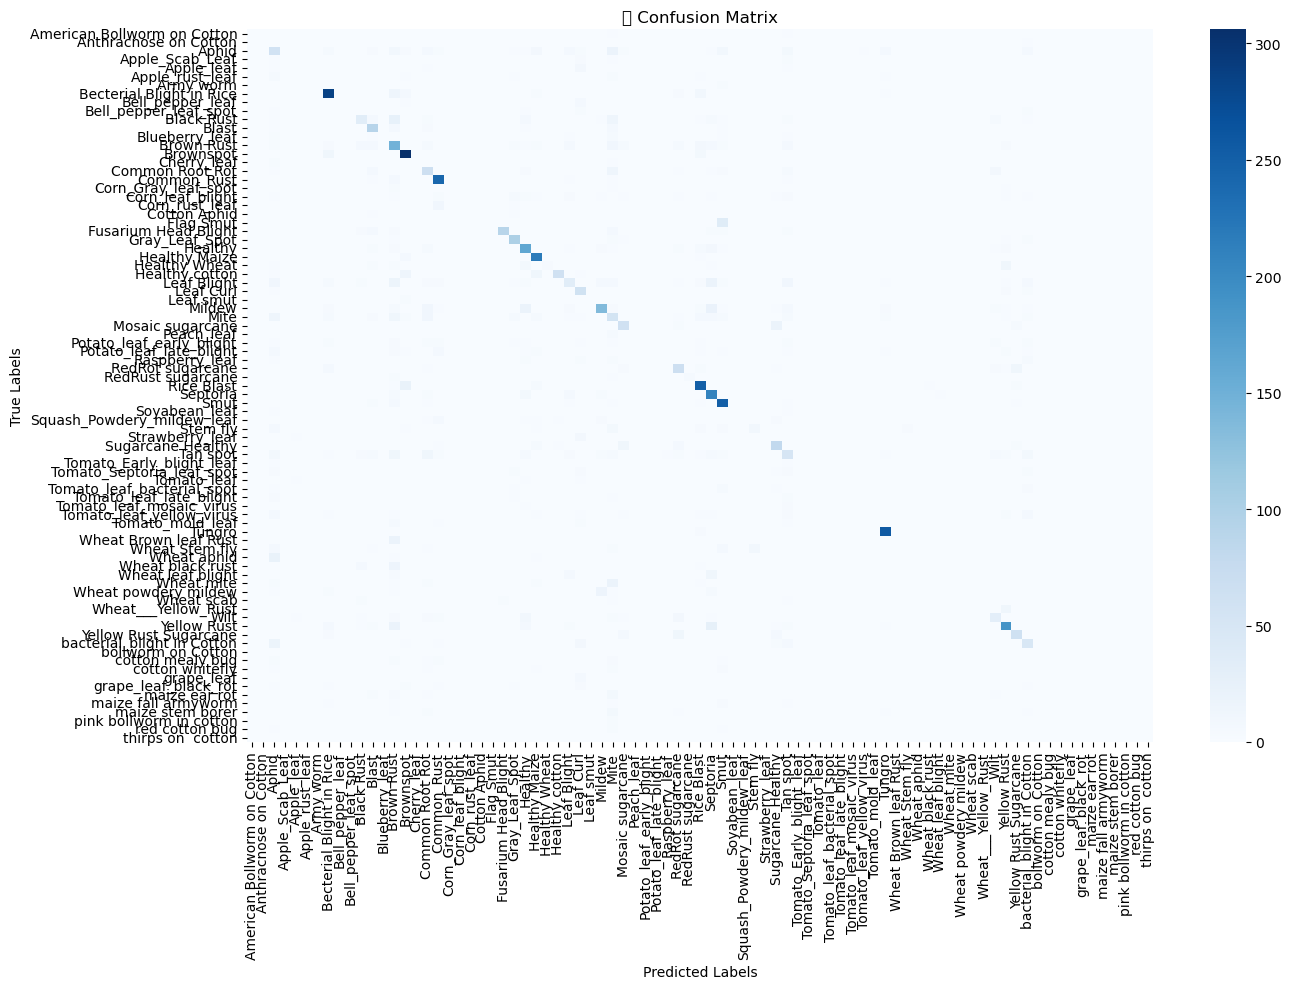

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, xticklabels=class_labels, yticklabels=class_labels, 
            annot=False, fmt='g', cmap='Blues')
plt.title('🧩 Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


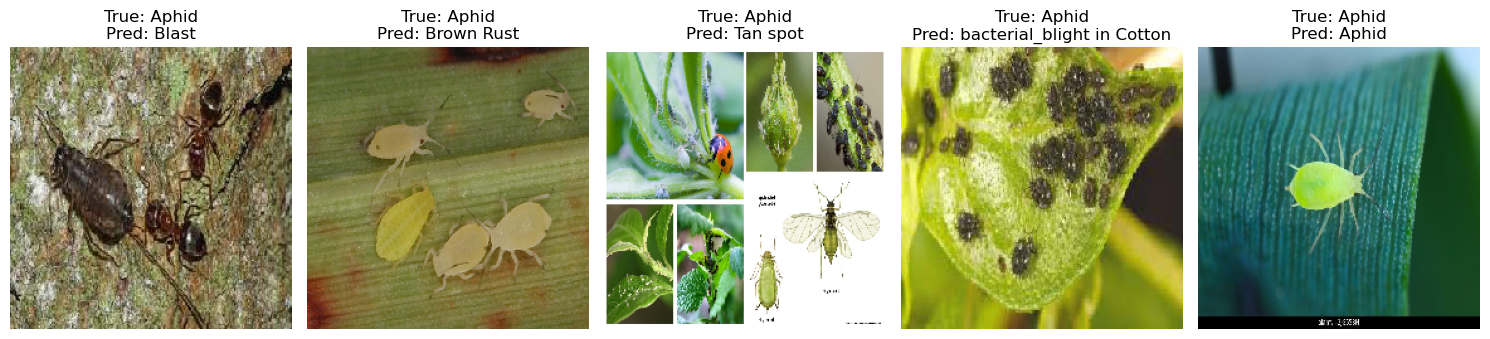

In [22]:
import matplotlib.pyplot as plt
import random

# Get a batch of test images and labels
x_test, y_test = next(test_generator)

# Predict on batch
y_probs = model.predict(x_test)
y_preds = np.argmax(y_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Plot 5 random samples
plt.figure(figsize=(15, 6))
for i in range(5):
    index = random.randint(0, len(x_test) - 1)
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[index])
    plt.axis('off')
    plt.title(f"True: {class_labels[true_labels[index]]}\nPred: {class_labels[y_preds[index]]}")
plt.tight_layout()
plt.show()


In [23]:
print("✅ Day 6 Part 2: Completed Check")

print(f"Test Accuracy: {test_accuracy:.4f}" if 'test_accuracy' in globals() else "❌ test_accuracy missing")
print(f"y_pred shape: {y_pred.shape}" if 'y_pred' in globals() else "❌ y_pred missing")
print(f"y_true shape: {y_true.shape}" if 'y_true' in globals() else "❌ y_true missing")
print(f"Class labels loaded: {len(class_labels)} classes" if 'class_labels' in globals() else "❌ class_labels missing")

if 'x_test' in globals() and len(x_test) > 0:
    print("🖼️ Sample predictions visualized successfully.")
else:
    print("❌ Sample prediction batch (x_test) missing.")


✅ Day 6 Part 2: Completed Check
Test Accuracy: 0.5948
y_pred shape: (6271,)
y_true shape: (6271,)
Class labels loaded: 83 classes
🖼️ Sample predictions visualized successfully.


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Smarter Augmentation
train_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_augmented = ImageDataGenerator(rescale=1./255)

# ✅ Corrected Paths — use .. to go up one level from 'notebook/'
train_path = '../preprocessed_dataset/train'
val_path = '../preprocessed_dataset/test'

# ✅ Load the images with correct paths
train_generator = train_augmented.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_augmented.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 25087 images belonging to 83 classes.
Found 6271 images belonging to 83 classes.


In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# ✅ Load MobileNetV2 base model
base_model = MobileNetV2(
    weights='imagenet',       # Pretrained on ImageNet
    include_top=False,        # Remove top classification layer
    input_tensor=Input(shape=(224, 224, 3))
)
base_model.trainable = False  # Initially freeze the base

# ✅ Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(83, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# ✅ Compile the model
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ MobileNetV2-based model is built and compiled.")


C:\Users\tiwar\AppData\Local\Temp\ipykernel_5976\1703500734.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
✅ MobileNetV2-based model is built and compiled.


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 🔁 Callbacks
checkpoint = ModelCheckpoint(
    '../save_model/mobilenetv2_phase1.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# 🔢 Train the model (initial phase)
history_phase1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, early_stop],
    verbose=1
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
491/784 ━━━━━━━━━━━━━━━━━━━━ 4:57 1s/step - accuracy: 0.1751 - loss: 3.7281

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2283 - loss: 3.4497
Epoch 1: val_accuracy improved from -inf to 0.56961, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 967s 1s/step - accuracy: 0.2284 - loss: 3.4490 - val_accuracy: 0.5696 - val_loss: 1.7600
Epoch 2/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.4838 - loss: 2.0759 
Epoch 2: val_accuracy improved from 0.56961 to 0.62542, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 14741s 19s/step - accuracy: 0.4838 - loss: 2.0758 - val_accuracy: 0.6254 - val_loss: 1.4302
Epoch 3/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5422 - loss: 1.7638
Epoch 3: val_accuracy improved from 0.62542 to 0.65173, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 1450s 2s/step - accuracy: 0.5422 - loss: 1.7637 - val_accuracy: 0.6517 - val_loss: 1.2843
Epoch 4/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5752 - loss: 1.5838
Epoch 4: val_accuracy improved from 0.65173 to 0.66353, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 1134s 1s/step - accuracy: 0.5752 - loss: 1.5837 - val_accuracy: 0.6635 - val_loss: 1.2084
Epoch 5/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5950 - loss: 1.4757
Epoch 5: val_accuracy improved from 0.66353 to 0.67820, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 1736s 2s/step - accuracy: 0.5950 - loss: 1.4756 - val_accuracy: 0.6782 - val_loss: 1.1498
Epoch 6/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6068 - loss: 1.4085
Epoch 6: val_accuracy improved from 0.67820 to 0.69622, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 1142s 1s/step - accuracy: 0.6068 - loss: 1.4085 - val_accuracy: 0.6962 - val_loss: 1.0932
Epoch 7/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6239 - loss: 1.3291
Epoch 7: val_accuracy did not improve from 0.69622
784/784 ━━━━━━━━━━━━━━━━━━━━ 2370s 3s/step - accuracy: 0.6239 - loss: 1.3292 - val_accuracy: 0.6938 - val_loss: 1.0639
Epoch 8/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6316 - loss: 1.2878
Epoch 8: val_accuracy improved from 0.69622 to 0.69829, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 2547s 3s/step - accuracy: 0.6316 - loss: 1.2878 - val_accuracy: 0.6983 - val_loss: 1.0428
Epoch 9/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 54s/step - accuracy: 0.6350 - loss: 1.2720 
Epoch 9: val_accuracy improved from 0.69829 to 0.70850, saving model to ../save_model/mobilenetv2_phase1.h5


784/784 ━━━━━━━━━━━━━━━━━━━━ 42101s 54s/step - accuracy: 0.6350 - loss: 1.2719 - val_accuracy: 0.7085 - val_loss: 1.0093
Epoch 10/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6496 - loss: 1.2386
Epoch 10: val_accuracy did not improve from 0.70850
784/784 ━━━━━━━━━━━━━━━━━━━━ 1042s 1s/step - accuracy: 0.6496 - loss: 1.2386 - val_accuracy: 0.7069 - val_loss: 0.9886
Restoring model weights from the end of the best epoch: 10.


Found 6271 images belonging to 83 classes.


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 140s 713ms/step - accuracy: 0.7227 - loss: 0.9748

✅ Final Test Accuracy: 0.7069
✅ Final Test Loss: 0.9886
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 698ms/step

📋 Classification Report:
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.45      0.62      0.53         8
      Anthracnose on Cotton       0.00      0.00      0.00         8
                      Aphid       0.60      0.54      0.57       177
            Apple_Scab_Leaf       0.21      0.19      0.20        16
                 Apple_leaf       0.61      0.61      0.61        18
            Apple_rust_leaf       0.62      0.33      0.43        24
                  Army worm       0.36      0.80      0.50         5
   Becterial Blight in Rice       0.91      0.92      0.91       326
           Bell_pepper_leaf       1.00      0.07      0.12        15
      Bell_pepper_leaf_spot       0.25      0.21      0.23        19
                 Black Rust      

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\AppData\Local\Temp\ipyker

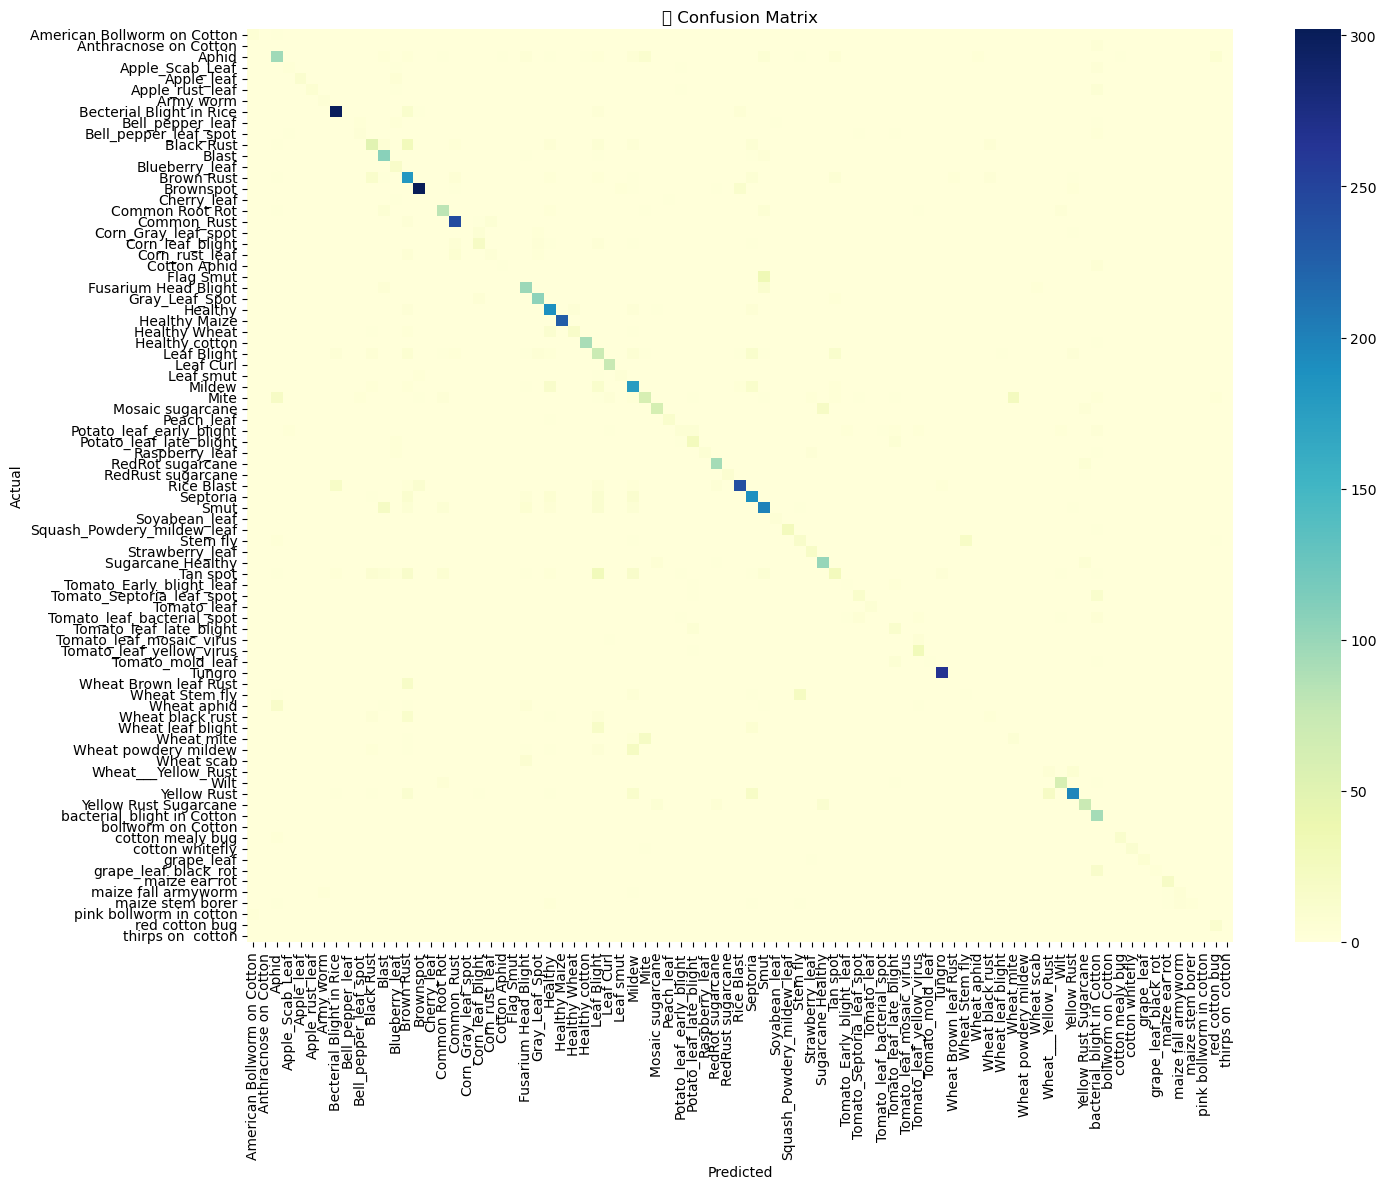

In [14]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load test data again (only rescale needed)
test_aug = ImageDataGenerator(rescale=1./255)
test_generator = test_aug.flow_from_directory(
    '../preprocessed_dataset/test',  # Adjust path if needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Step 2: Evaluate model
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")
print(f"✅ Final Test Loss: {test_loss:.4f}")

# Step 3: Get predictions
pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Step 4: Classification Report
class_labels = list(test_generator.class_indices.keys())
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels, fmt='d')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [15]:
# ✅ Create folder if not exists
import os
save_dir = '../saved_models'
os.makedirs(save_dir, exist_ok=True)

# ✅ Save the final fine-tuned model (Day 7)
model.save(os.path.join(save_dir, 'mobilenetv2_phase1.keras'))  # ✅ Recommended modern format
model.save(os.path.join(save_dir, 'mobilenetv2_phase1.h5'))     # Optional: legacy format

print("✅ Model saved successfully as:")
print("   • mobilenetv2_phase1.keras")
print("   • mobilenetv2_phase1.h5")


✅ Model saved successfully as:
   • mobilenetv2_phase1.keras
   • mobilenetv2_phase1.h5


In [18]:
import os
import shutil

# ✅ Define new destinations
move_operations = {
    '../notebook/saved_models/final_model_day5.h5': 'models/cnn/final_model_day5.h5',
    '../notebook/saved_models/final_model_day6.h5': 'models/cnn/final_model_day6.h5',
    '../save_model/mobilenetv2_phase1.h5': 'models/mobilenet/mobilenetv2_phase1.h5',
    '../saved_models/mobilenetv2_phase1.h5': 'models/mobilenet/mobilenetv2_phase1.h5',
    '../saved_models/mobilenetv2_phase1.keras': 'models/mobilenet/mobilenetv2_phase1.keras'
}

moved_files = []

for src, dest in move_operations.items():
    if os.path.exists(src):
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.move(src, dest)
        print(f"✅ Moved: {src} → {dest}")
        moved_files.append(dest)
    else:
        print(f"⚠️ Skipped (not found): {src}")

# Optional: Summary
if moved_files:
    print("\n🎯 Successfully moved all existing model files.")
else:
    print("\n🚫 No files were moved. Please check paths.")


✅ Moved: ../notebook/saved_models/final_model_day5.h5 → models/cnn/final_model_day5.h5
✅ Moved: ../notebook/saved_models/final_model_day6.h5 → models/cnn/final_model_day6.h5
✅ Moved: ../save_model/mobilenetv2_phase1.h5 → models/mobilenet/mobilenetv2_phase1.h5
✅ Moved: ../saved_models/mobilenetv2_phase1.h5 → models/mobilenet/mobilenetv2_phase1.h5
✅ Moved: ../saved_models/mobilenetv2_phase1.keras → models/mobilenet/mobilenetv2_phase1.keras

🎯 Successfully moved all existing model files.


In [20]:
import shutil
import os

# Define paths
old_path = os.path.abspath('../notebook/models')   # models inside notebook/
new_path = os.path.abspath('../models')            # desired location in root

# Move only if it exists and not already moved
if os.path.exists(old_path):
    if not os.path.exists(new_path):
        shutil.move(old_path, new_path)
        print(f"✅ Successfully moved 'models' folder from 'notebook/' to root directory.")
    else:
        print(f"⚠️ 'models' folder already exists in root. Please check manually to avoid overwriting.")
else:
    print(f"❌ 'models' folder not found in notebook/. Nothing moved.")


✅ Successfully moved 'models' folder from 'notebook/' to root directory.


#day 8

In [2]:
# ✅ Day 8 Cell 0: Setup and Clear Memory

import tensorflow as tf
import os
import gc

# Clear previous model from memory (important before loading a new one)
tf.keras.backend.clear_session()
gc.collect()

print("✅ TensorFlow session cleared.")

# Confirm current working directory (must be /notebook)
cwd = os.getcwd()
print(f"📁 Current Working Directory: {cwd}")

# Ensure the correct MobilenetV2 Phase 1 model path
model_path = "../models/mobilenet/mobilenetv2_phase1.keras"

# Check if file exists
if os.path.exists(model_path):
    print(f"✅ Found model: {model_path}")
else:
    raise FileNotFoundError(f"❌ Model not found at: {model_path}")


✅ TensorFlow session cleared.
📁 Current Working Directory: C:\Users\tiwar\plant_disease_detection\notebook
✅ Found model: ../models/mobilenet/mobilenetv2_phase1.keras


In [3]:
# ✅ DAY 8 - CELL 1
from tensorflow.keras.models import load_model

# Clear any previous session (already done earlier but safe)
import tensorflow as tf
tf.keras.backend.clear_session()

# Load the Phase 1 fine-tuned model
model_path = '../models/mobilenet/mobilenetv2_phase1.keras'
model = load_model(model_path)

# Print model summary to check how many layers are frozen/unfrozen
model.summary()

print(f"\n✅ Model loaded from: {model_path}")


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,654,888 (13.94 MB)

 Trainable params: 698,451 (2.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 698,453 (2.66 MB)


✅ Model loaded from: ../models/mobilenet/mobilenetv2_phase1.keras


In [8]:
# 🔍 Inspect all layers to locate MobileNetV2
for i, layer in enumerate(model.layers):
    print(f"{i:02d} ➤ Name: {layer.name}, Type: {type(layer)}")


00 ➤ Name: input_layer, Type: <class 'keras.src.layers.core.input_layer.InputLayer'>
01 ➤ Name: Conv1, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
02 ➤ Name: bn_Conv1, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
03 ➤ Name: Conv1_relu, Type: <class 'keras.src.layers.activations.relu.ReLU'>
04 ➤ Name: expanded_conv_depthwise, Type: <class 'keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D'>
05 ➤ Name: expanded_conv_depthwise_BN, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
06 ➤ Name: expanded_conv_depthwise_relu, Type: <class 'keras.src.layers.activations.relu.ReLU'>
07 ➤ Name: expanded_conv_project, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
08 ➤ Name: expanded_conv_project_BN, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
09 ➤ Name: block_1_expand, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
10 ➤ Nam

In [9]:
from tensorflow.keras.optimizers import Adam

# ✅ Step 1: Freeze all layers up to (but not including) classifier
freeze_until = "out_relu"

set_trainable = False
for layer in model.layers:
    if layer.name == freeze_until:
        set_trainable = True
    layer.trainable = set_trainable

# ✅ Step 2: Recompile the model with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Print layer trainability summary
trainable_count = sum([layer.trainable for layer in model.layers])
print(f"✅ Fine-tuning setup complete. 🔓 Trainable layers: {trainable_count}/{len(model.layers)}")


✅ Fine-tuning setup complete. 🔓 Trainable layers: 6/159


In [2]:
# ✅ Day 8 - Cell 2.4: Create validation split (20%) from train

import os
import shutil
import random
from tqdm import tqdm

# Set paths
base_dir = "../preprocessed_dataset"
old_train_dir = os.path.join(base_dir, "train")
new_train_dir = os.path.join(base_dir, "train_temp")
val_dir = os.path.join(base_dir, "val")

# Step 1: Make sure val and new train folders are fresh
if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
if os.path.exists(new_train_dir):
    shutil.rmtree(new_train_dir)

# Step 2: Re-create directories
os.makedirs(val_dir, exist_ok=True)
os.makedirs(new_train_dir, exist_ok=True)

# Step 3: Split each class folder
for class_name in tqdm(os.listdir(old_train_dir), desc="Splitting train/val"):
    class_path = os.path.join(old_train_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    split_idx = int(0.8 * len(images))
    train_imgs = images[:split_idx]
    val_imgs = images[split_idx:]

    # Create new folders
    os.makedirs(os.path.join(new_train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    # Move images to new folders
    for img in train_imgs:
        shutil.copy2(os.path.join(class_path, img), os.path.join(new_train_dir, class_name, img))
    for img in val_imgs:
        shutil.copy2(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

# Step 4: Replace old train with new train
shutil.rmtree(old_train_dir)
os.rename(new_train_dir, old_train_dir)

print("✅ Split complete: train/ (80%) and val/ (20%) now ready.")


Splitting train/val: 100%|█████████████████████████████████████████████████████████████| 83/83 [01:18<00:00,  1.05it/s]


✅ Split complete: train/ (80%) and val/ (20%) now ready.


In [3]:
import os

base_path = "../preprocessed_dataset"

for folder in ["train", "val", "test"]:
    path = os.path.join(base_path, folder)
    class_count = len(os.listdir(path))
    print(f"{folder}/ contains {class_count} classes ✅")


train/ contains 83 classes ✅
val/ contains 83 classes ✅
test/ contains 83 classes ✅


In [5]:
# Check in the full dataset if images exist for this class
import os

source_class_path = "../training_data/Tomato___Late_blight"
total = len(os.listdir(source_class_path)) if os.path.exists(source_class_path) else 0
print(f"Total images originally in Tomato___Late_blight: {total}")


Total images originally in Tomato___Late_blight: 0


In [7]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\tiwar\plant_disease_detection\notebook


In [10]:
import os

base_path = "../preprocessed_dataset"
folders = ["train", "val", "test"]
empty_classes = {}

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    for class_name in sorted(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            if count == 0:
                empty_classes.setdefault(folder, []).append(class_name)

# Print results
for folder, classes in empty_classes.items():
    print(f"⚠️ {folder}/ has {len(classes)} empty classes:")
    for cls in classes:
        print("•", cls)
if not empty_classes:
    print("✅ All folders have images. You're good to go!")


✅ All folders have images. You're good to go!


In [14]:
# ✅ Cell 2.5 – Create data generators (train + val + real split)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

train_dir = "../preprocessed_dataset/train"
val_dir = "../preprocessed_dataset/val"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 20038 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.


In [15]:
# ✅ Reload MobileNetV2 Phase 1 model & prepare for fine-tuning

from tensorflow.keras.models import load_model

# Load the pre-trained MobileNetV2 model
model = load_model('../models/mobilenet/mobilenetv2_phase1.keras')

# Freeze all layers except the last 6
for layer in model.layers[:-6]:
    layer.trainable = False
for layer in model.layers[-6:]:
    layer.trainable = True

# Recompile the model with a low learning rate for fine-tuning
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Fine-tuning setup complete. 🔓 Trainable layers:", sum([l.trainable for l in model.layers]), "/", len(model.layers))


✅ Fine-tuning setup complete. 🔓 Trainable layers: 6 / 159


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
# ✅ Cell 3 – Fine-tune MobileNetV2 (Phase 2 Training)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Set callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='../models/mobilenet/mobilenetv2_phase2.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

# 🔁 Train the fine-tuned model
history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
148/627 ━━━━━━━━━━━━━━━━━━━━ 9:26 1s/step - accuracy: 0.6874 - loss: 1.0574

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6833 - loss: 1.0740
Epoch 1: val_accuracy improved from -inf to 0.74252, saving model to ../models/mobilenet/mobilenetv2_phase2.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 945s 1s/step - accuracy: 0.6833 - loss: 1.0740 - val_accuracy: 0.7425 - val_loss: 0.8474 - learning_rate: 1.0000e-05
Epoch 2/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.6875 - loss: 1.0661
Epoch 2: val_accuracy improved from 0.74252 to 0.74450, saving model to ../models/mobilenet/mobilenetv2_phase2.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 679s 1s/step - accuracy: 0.6875 - loss: 1.0661 - val_accuracy: 0.7445 - val_loss: 0.8373 - learning_rate: 1.0000e-05
Epoch 3/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.6970 - loss: 1.0334
Epoch 3: val_accuracy improved from 0.74450 to 0.74530, saving model to ../models/mobilenet/mobilenetv2_phase2.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 596s 950ms/step - accuracy: 0.6970 - loss: 1.0334 - val_accuracy: 0.7453 - val_lo

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../preprocessed_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6271 images belonging to 83 classes.


In [5]:
from tensorflow.keras.models import load_model

model = load_model('../models/mobilenet/mobilenetv2_phase2.keras')
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 170s 840ms/step - accuracy: 0.7417 - loss: 0.8711

✅ Test Accuracy: 0.7359
📉 Test Loss: 0.8840


# day 9

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Advanced augmentation for training data
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,           # rotate images
    width_shift_range=0.2,       # horizontal shift
    height_shift_range=0.2,      # vertical shift
    shear_range=0.2,             # shearing
    zoom_range=0.2,              # zoom in/out
    horizontal_flip=True,        # flip images
    vertical_flip=True,          # vertical flip
    brightness_range=[0.8, 1.2], # change brightness
    fill_mode='nearest'          # fill empty pixels
)

# ✅ Light augmentation (only rescale) for validation
val_aug = ImageDataGenerator(rescale=1./255)

# ✅ Create generators
train_generator = train_aug.flow_from_directory(
    '../preprocessed_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_aug.flow_from_directory(
    '../preprocessed_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 20038 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# 🔁 Load the best fine-tuned model from Phase 2
model = load_model('../models/mobilenet/mobilenetv2_phase2.keras')

# 🔧 Compile again (optional but safe to reset optimizer if needed)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Set callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='../models/mobilenet/mobilenetv2_phase3.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

# 🚀 Train model using augmented data
history_phase3 = model.fit(
    train_generator,
    epochs=30,  # More epochs for better convergence
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)


Epoch 1/30
 74/627 ━━━━━━━━━━━━━━━━━━━━ 11:10 1s/step - accuracy: 0.5839 - loss: 1.4700

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5844 - loss: 1.4774
Epoch 1: val_accuracy improved from -inf to 0.67934, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 943s 1s/step - accuracy: 0.5845 - loss: 1.4774 - val_accuracy: 0.6793 - val_loss: 1.0711 - learning_rate: 0.0010
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6177 - loss: 1.3451
Epoch 2: val_accuracy improved from 0.67934 to 0.68984, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 948s 2s/step - accuracy: 0.6177 - loss: 1.3451 - val_accuracy: 0.6898 - val_loss: 1.0330 - learning_rate: 0.0010
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6233 - loss: 1.2896
Epoch 3: val_accuracy improved from 0.68984 to 0.69340, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 964s 2s/step - accuracy: 0.6233 - loss: 1.2896 - val_accuracy: 0.6934 - val_loss: 1.0199 - lear

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Load the last best model saved before shutdown (Epoch 10)
model = load_model('../models/mobilenet/mobilenetv2_phase3.keras')

# 🔧 Re-compile model (important after loading)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Set up callbacks again
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='../models/mobilenet/mobilenetv2_phase3.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

# 🚀 Resume training — run 10–20 more epochs (pick based on time)
history_phase3 = model.fit(
    train_generator,
    epochs=20,  # You already did 10, this continues
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
233/627 ━━━━━━━━━━━━━━━━━━━━ 6:48 1s/step - accuracy: 0.6860 - loss: 1.0780

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6810 - loss: 1.0900
Epoch 1: val_accuracy improved from -inf to 0.72133, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 791s 1s/step - accuracy: 0.6810 - loss: 1.0900 - val_accuracy: 0.7213 - val_loss: 0.9310 - learning_rate: 0.0010
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6765 - loss: 1.0841
Epoch 2: val_accuracy did not improve from 0.72133
627/627 ━━━━━━━━━━━━━━━━━━━━ 778s 1s/step - accuracy: 0.6765 - loss: 1.0841 - val_accuracy: 0.7182 - val_loss: 0.9449 - learning_rate: 0.0010
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6810 - loss: 1.0543
Epoch 3: val_accuracy improved from 0.72133 to 0.72410, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 759s 1s/step - accuracy: 0.6810 - loss: 1.0543 - val_accuracy: 0.7241 - val_loss: 0.9129 - learning_rate: 0.0010
Epoch 4/20
449/627 ━━━━━━━━━━━━━━━━━━━━ 5:49:14 

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Load saved model from best Epoch 3
model = load_model('../models/mobilenet/mobilenetv2_phase3.keras')

# Re-compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

checkpoint = ModelCheckpoint(
    filepath='../models/mobilenet/mobilenetv2_phase3.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Resume training — continue remaining epochs
history_phase3 = model.fit(
    train_generator,
    epochs=20,  # Or fewer if time-limited
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
472/627 ━━━━━━━━━━━━━━━━━━━━ 3:11 1s/step - accuracy: 0.6796 - loss: 1.0960

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6783 - loss: 1.0985
Epoch 1: val_accuracy improved from -inf to 0.71460, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 916s 1s/step - accuracy: 0.6783 - loss: 1.0986 - val_accuracy: 0.7146 - val_loss: 0.9538 - learning_rate: 0.0010
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6758 - loss: 1.0926
Epoch 2: val_accuracy improved from 0.71460 to 0.71519, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 886s 1s/step - accuracy: 0.6758 - loss: 1.0926 - val_accuracy: 0.7152 - val_loss: 0.9549 - learning_rate: 0.0010
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6829 - loss: 1.0544
Epoch 3: val_accuracy improved from 0.71519 to 0.72034, saving model to ../models/mobilenet/mobilenetv2_phase3.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 860s 1s/step - accuracy: 0.6829 - loss: 1.0544 - val_accuracy: 0.7203 - val_loss: 0.9534 - lear

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Load test images with correct relative path
test_generator = test_datagen.flow_from_directory(
    '../preprocessed_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6271 images belonging to 83 classes.


196/196 ━━━━━━━━━━━━━━━━━━━━ 165s 822ms/step - accuracy: 0.7723 - loss: 0.8084

✅ Test Accuracy: 0.7512
📉 Test Loss: 0.8368


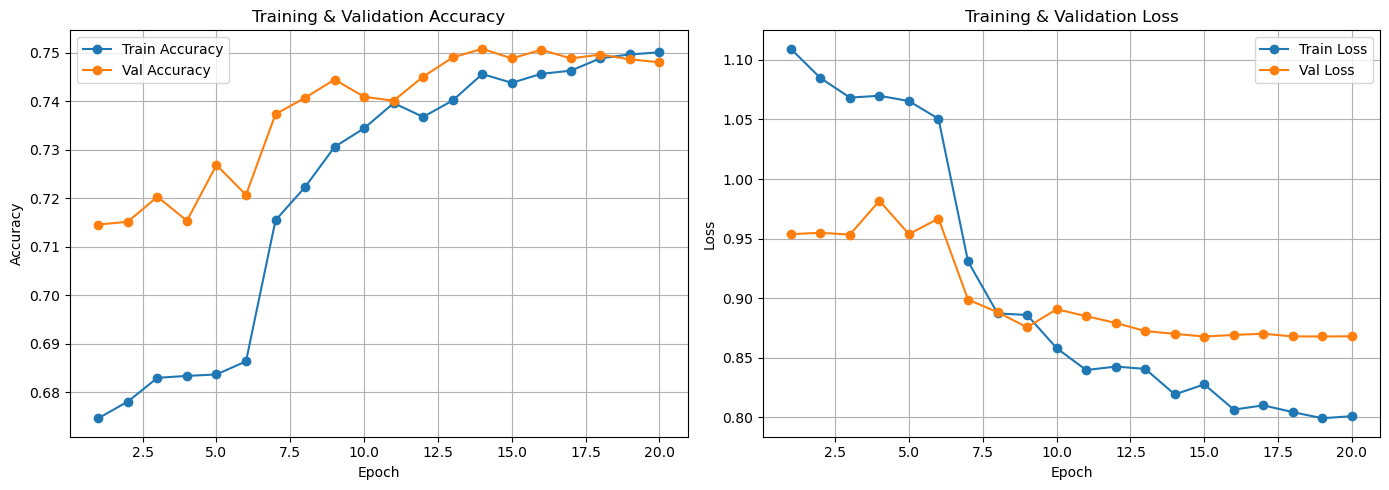

In [9]:
# ✅ Cell 3 – Evaluate & Visualize Fine-Tuned MobileNetV2 Phase 3

import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 📌 Load the best saved model from Phase 3
best_model = load_model('../models/mobilenet/mobilenetv2_phase3.keras')

# 🧪 Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

# 📊 Plot training history from history_phase3
acc = history_phase3.history['accuracy']
val_acc = history_phase3.history['val_accuracy']
loss = history_phase3.history['loss']
val_loss = history_phase3.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

# 🔷 Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 🔶 Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# day 10

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🌾 Advanced data augmentation strategy
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen_aug = ImageDataGenerator(rescale=1./255)

# ✅ Load from preprocessed_dataset/train and val
train_generator_aug = train_datagen_aug.flow_from_directory(
    '../preprocessed_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator_aug = val_datagen_aug.flow_from_directory(
    '../preprocessed_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 20038 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 🔄 Load best model from Phase 3
model = load_model('../models/mobilenet/mobilenetv2_phase3.keras')

# 🧠 Callbacks setup
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

checkpoint = ModelCheckpoint(
    filepath='../models/mobilenet/mobilenetv2_phase4.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

# 🔁 Retrain model with advanced augmentations
history_phase4 = model.fit(
    train_generator_aug,
    epochs=20,
    validation_data=val_generator_aug,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
379/627 ━━━━━━━━━━━━━━━━━━━━ 4:54 1s/step - accuracy: 0.7398 - loss: 0.8197

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7427 - loss: 0.8099
Epoch 1: val_accuracy improved from -inf to 0.74807, saving model to ../models/mobilenet/mobilenetv2_phase4.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 879s 1s/step - accuracy: 0.7428 - loss: 0.8099 - val_accuracy: 0.7481 - val_loss: 0.8771 - learning_rate: 4.0000e-05
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 72s/step - accuracy: 0.7513 - loss: 0.7922  
Epoch 2: val_accuracy did not improve from 0.74807
627/627 ━━━━━━━━━━━━━━━━━━━━ 45172s 72s/step - accuracy: 0.7513 - loss: 0.7922 - val_accuracy: 0.7469 - val_loss: 0.8752 - learning_rate: 4.0000e-05
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.7578 - loss: 0.7649
Epoch 3: val_accuracy improved from 0.74807 to 0.74886, saving model to ../models/mobilenet/mobilenetv2_phase4.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 726s 1s/step - accuracy: 0.7578 - loss: 0.7649 - val_accuracy: 0.7489 - val_loss: 0.8745 - learning_rate: 4.0000e-05
Epoch 4/20
627/627 ━━━━━━━━

In [4]:
# ✅ Cell 3 – Evaluate MobileNetV2 Phase 4 (Final Evaluation)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# 🔁 Recreate test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../preprocessed_dataset/test',     # ✅ Check this path matches your actual test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ✅ Load best saved model
best_model = load_model('../models/mobilenet/mobilenetv2_phase4.keras')

# 🧪 Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


Found 6271 images belonging to 83 classes.
196/196 ━━━━━━━━━━━━━━━━━━━━ 148s 744ms/step - accuracy: 0.7746 - loss: 0.8056

✅ Test Accuracy: 0.7578
📉 Test Loss: 0.8249


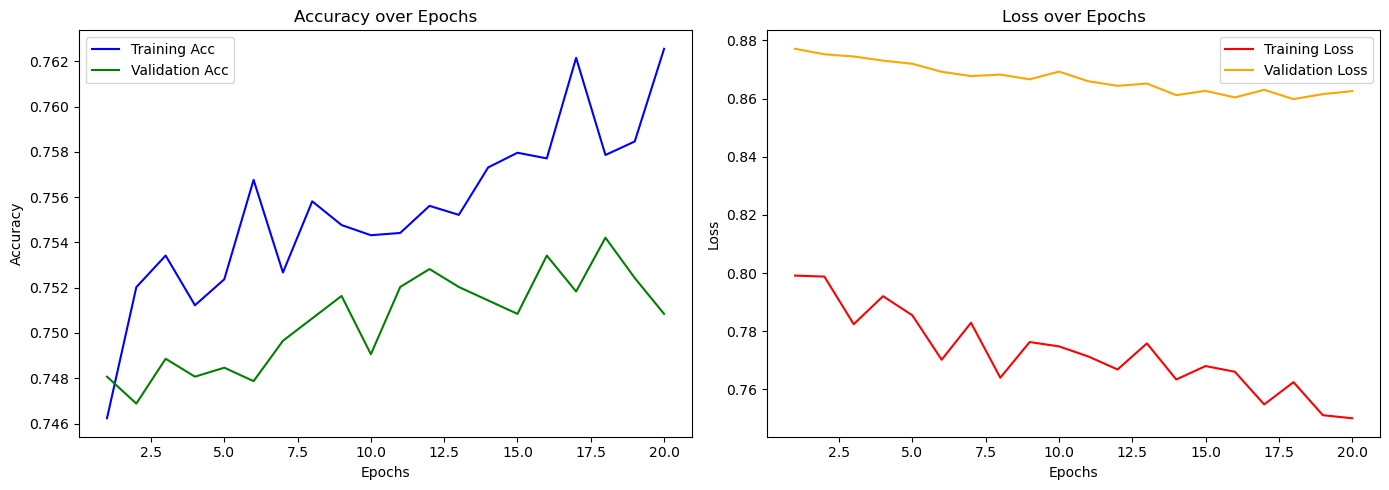

In [5]:
# 📈 Plot training vs validation accuracy & loss

acc = history_phase4.history['accuracy']
val_acc = history_phase4.history['val_accuracy']
loss = history_phase4.history['loss']
val_loss = history_phase4.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'g', label='Validation Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# ✅ Day 10 – Cell 1: Unfreeze deeper layers for fine-tuning

from tensorflow.keras.optimizers import Adam

# 🔓 Unfreeze more layers (keep first 120 frozen)
for layer in model.layers[:120]:
    layer.trainable = False
for layer in model.layers[120:]:
    layer.trainable = True

# ✅ Recompile with lower learning rate
model.compile(
    optimizer=Adam(learning_rate=5e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 🔍 Summary of trainable layers
trainable_count = sum([layer.trainable for layer in model.layers])
print(f"🔓 Layers Trainable: {trainable_count} / {len(model.layers)}")


🔓 Layers Trainable: 39 / 159


In [11]:
# ✅ Day 10 – Cell 2: Fine-tune MobileNetV2 with deeper unfreezing (Phase 5)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Set up callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='../models/mobilenet/mobilenetv2_phase5.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

# 🔁 Train the model
history_phase5 = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)


Epoch 1/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4038 - loss: 3.3769
Epoch 1: val_accuracy improved from -inf to 0.70885, saving model to ../models/mobilenet/mobilenetv2_phase5.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 3712s 6s/step - accuracy: 0.4040 - loss: 3.3755 - val_accuracy: 0.7089 - val_loss: 1.1553 - learning_rate: 5.0000e-06
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6247 - loss: 1.3649
Epoch 2: val_accuracy improved from 0.70885 to 0.71638, saving model to ../models/mobilenet/mobilenetv2_phase5.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 901s 1s/step - accuracy: 0.6247 - loss: 1.3648 - val_accuracy: 0.7164 - val_loss: 1.0363 - learning_rate: 5.0000e-06
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6517 - loss: 1.1862
Epoch 3: val_accuracy did not improve from 0.71638
627/627 ━━━━━━━━━━━━━━━━━━━━ 1051s 2s/step - accuracy: 0.6517 - loss: 1.1862 - val_accuracy: 0.7148 - val_loss: 0.9956 - learning_rate: 5.0000e-06
Epoch 4/30
627/627 ━━━━

In [7]:
# ✅ Cell 3 – Evaluate Phase 5 Fine-Tuned Model on Test Set

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Update path if needed based on your structure
test_generator = test_datagen.flow_from_directory(
    '../preprocessed_dataset/test',  # ✅ Adjust this if your path differs
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load best fine-tuned model (Phase 5)
best_model = load_model('../models/mobilenet/mobilenetv2_phase5.keras')

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=1)

print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


Found 6271 images belonging to 83 classes.


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 716ms/step - accuracy: 0.7803 - loss: 0.7632

✅ Test Accuracy: 0.7629
📉 Test Loss: 0.7768


# ------------------------------------------
# 📅 Day 11: EfficientNetB0 – Phase 1 (Head Training)
# ------------------------------------------


In [1]:
# 📦 Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Check TensorFlow version
print("TensorFlow Version:", tf.__version__)

# ✅ Paths
train_dir = '../plant_disease_detection/preprocessed_dataset/train'
val_dir = '../plant_disease_detection/preprocessed_dataset/val'
test_dir = '../plant_disease_detection/preprocessed_dataset/test'
model_save_path = '../models/efficientnet/efficientnetb0_phase1.keras'

# ✅ Create model save folder if not exist
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)



TensorFlow Version: 2.19.0


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = '../preprocessed_dataset/train'
val_dir = '../preprocessed_dataset/val'
test_dir = '../preprocessed_dataset/test'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 20038 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.
Found 6271 images belonging to 83 classes.


In [4]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Input shape for EfficientNetB0
input_shape = (224, 224, 3)
num_classes = train_generator.num_classes  # Should be 83

# Load EfficientNetB0 with pretrained ImageNet weights (exclude top layer)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Freeze base model initially
base_model.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

# Final model
efficient_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
efficient_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
efficient_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               7 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 4,155,894 (15.85 MB)

 Trainable params: 106,323 (415.32 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

# Ensure model saving path exists
efficientnet_model_path = "../models/efficientnet/"
os.makedirs(efficientnet_model_path, exist_ok=True)

# Callbacks
checkpoint = ModelCheckpoint(
    filepath=os.path.join(efficientnet_model_path, "efficientnetb0_phase1.keras"),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# Train the model
history_efficientnet_phase1 = efficient_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop, reduce_lr]
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 74/627 ━━━━━━━━━━━━━━━━━━━━ 8:57 972ms/step - accuracy: 0.0378 - loss: 4.0670

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 920ms/step - accuracy: 0.0429 - loss: 3.9545
Epoch 1: val_accuracy improved from -inf to 0.04080, saving model to ../models/efficientnet/efficientnetb0_phase1.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 744s 1s/step - accuracy: 0.0429 - loss: 3.9544 - val_accuracy: 0.0408 - val_loss: 3.8936 - learning_rate: 0.0010
Epoch 2/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - accuracy: 0.0511 - loss: 3.9002
Epoch 2: val_accuracy improved from 0.04080 to 0.05130, saving model to ../models/efficientnet/efficientnetb0_phase1.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 709s 1s/step - accuracy: 0.0511 - loss: 3.9002 - val_accuracy: 0.0513 - val_loss: 3.8959 - learning_rate: 0.0010
Epoch 3/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.0543 - loss: 3.9012
Epoch 3: val_accuracy improved from 0.05130 to 0.05268, saving model to ../models/efficientnet/efficientnetb0_phase1.keras

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
627/627 ━━━━━━━━━━━

In [5]:
# 🔓 Unfreeze EfficientNetB0 base model for fine-tuning
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# 📥 Load the EfficientNetB0 model trained in Phase 1
efficient_model = load_model('../models/efficientnet/efficientnetb0_phase1.keras')

# ✅ Unfreeze the model
efficient_model.trainable = True

# 🧊 Freeze first 80 layers (you can adjust for GPU capacity)
for layer in efficient_model.layers[:80]:
    layer.trainable = False

# ⚙️ Recompile with smaller learning rate
efficient_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Corrected relative paths
train_dir = '../preprocessed_dataset/train'
val_dir = '../preprocessed_dataset/val'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 20038 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

# 📁 Ensure model save path exists
efficientnet_model_path = "../models/efficientnet/"
os.makedirs(efficientnet_model_path, exist_ok=True)

# 📌 Callbacks
checkpoint = ModelCheckpoint(
    filepath=os.path.join(efficientnet_model_path, "efficientnetb0_phase2.keras"),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# 🚀 Train EfficientNet Phase 2
history_efficientnet_phase2 = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop, reduce_lr]
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
592/627 ━━━━━━━━━━━━━━━━━━━━ 1:32:10 158s/step - accuracy: 0.0598 - loss: 3.8556

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 149s/step - accuracy: 0.0600 - loss: 3.8551  
Epoch 1: val_accuracy improved from -inf to 0.06298, saving model to ../models/efficientnet/efficientnetb0_phase2.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 93586s 149s/step - accuracy: 0.0600 - loss: 3.8550 - val_accuracy: 0.0630 - val_loss: 3.8353 - learning_rate: 1.0000e-05
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.0613 - loss: 3.8549
Epoch 2: val_accuracy did not improve from 0.06298
627/627 ━━━━━━━━━━━━━━━━━━━━ 722s 1s/step - accuracy: 0.0613 - loss: 3.8549 - val_accuracy: 0.0616 - val_loss: 3.8340 - learning_rate: 1.0000e-05
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.0667 - loss: 3.8314
Epoch 3: val_accuracy improved from 0.06298 to 0.06338, saving model to ../models/efficientnet/efficientnetb0_phase2.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 778s 1s/step - accuracy: 0.0667 - loss: 3.8314 - val_accuracy: 0.0634 - val_loss: 3.8334 - learning_rate: 1.0000e-05
Epoch 4/30

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# ✅ Load trained model from Phase 1
efficient_model = load_model('../models/efficientnet/efficientnetb0_phase1.keras')

# ✅ Unfreeze the whole model
efficient_model.trainable = True

# 🧊 Freeze fewer layers (freeze only first 60)
for layer in efficient_model.layers[:60]:
    layer.trainable = False

# ✅ Recompile with higher learning rate
efficient_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Setup callbacks again
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

efficientnet_model_path = "../models/efficientnet/"
os.makedirs(efficientnet_model_path, exist_ok=True)

checkpoint = ModelCheckpoint(
    filepath=os.path.join(efficientnet_model_path, "efficientnetb0_phase2_fixed.keras"),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# ✅ Train again with fixed setup
history_efficientnet_phase2_fixed = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop, reduce_lr]
)


Epoch 1/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 69s/step - accuracy: 0.0589 - loss: 3.8615  
Epoch 1: val_accuracy improved from -inf to 0.06378, saving model to ../models/efficientnet/efficientnetb0_phase2_fixed.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 43211s 69s/step - accuracy: 0.0589 - loss: 3.8614 - val_accuracy: 0.0638 - val_loss: 3.8357 - learning_rate: 1.0000e-04
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.0597 - loss: 3.8354
Epoch 2: val_accuracy did not improve from 0.06378
627/627 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.0597 - loss: 3.8354 - val_accuracy: 0.0610 - val_loss: 3.8355 - learning_rate: 1.0000e-04
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0589 - loss: 3.8538
Epoch 3: val_accuracy did not improve from 0.06378
627/627 ━━━━━━━━━━━━━━━━━━━━ 2394s 4s/step - accuracy: 0.0589 - loss: 3.8538 - val_accuracy: 0.0594 - val_loss: 3.8357 - learning_rate: 1.0000e-04
Epoch 4/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0606

In [17]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Step 1: Load base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Step 2: Freeze first 80 layers (initially)
for layer in base_model.layers[:80]:
    layer.trainable = False

# Step 3: Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(83, activation='softmax')(x)

# Step 4: Final model
efficient_model = Model(inputs=base_model.input, outputs=output)

# Step 5: Compile
efficient_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

# Create model saving path
efficientnet_model_path = "../models/efficientnet/"
os.makedirs(efficientnet_model_path, exist_ok=True)

# Callback definitions
checkpoint = ModelCheckpoint(
    filepath=os.path.join(efficientnet_model_path, "efficientnetb0_strongstart.keras"),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


In [ ]:
history_efficientnet_strongstart = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop, reduce_lr]
)


Epoch 1/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1369 - loss: 4.6069
Epoch 1: val_accuracy improved from -inf to 0.24995, saving model to ../models/efficientnet/efficientnetb0_strongstart.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 1159s 2s/step - accuracy: 0.1370 - loss: 4.6059 - val_accuracy: 0.2500 - val_loss: 3.3373 - learning_rate: 1.0000e-04
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3374 - loss: 2.9785
Epoch 2: val_accuracy did not improve from 0.24995
627/627 ━━━━━━━━━━━━━━━━━━━━ 1101s 2s/step - accuracy: 0.3374 - loss: 2.9783 - val_accuracy: 0.2365 - val_loss: 3.1935 - learning_rate: 1.0000e-04
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4258 - loss: 2.4390
Epoch 3: val_accuracy improved from 0.24995 to 0.32759, saving model to ../models/efficientnet/efficientnetb0_strongstart.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 1074s 2s/step - accuracy: 0.4258 - loss: 2.4390 - val_accuracy: 0.3276 - val_loss: 2.7437 - learning_rate: 1.0000e-04


In [1]:
from tensorflow.keras.models import load_model

# Load the best checkpoint so far (last saved model from epoch 11)
efficient_model = load_model('../models/efficientnet/efficientnetb0_strongstart.keras')


In [2]:
from tensorflow.keras.optimizers import Adam

efficient_model.compile(
    optimizer=Adam(learning_rate=2e-5),  # reduced LR after epoch 9
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    filepath='../models/efficientnet/efficientnetb0_strongstart.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)


In [6]:
history_resume = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,                # total number of epochs
    initial_epoch=11,         # resume from epoch 12
    callbacks=[checkpoint, early_stop, reduce_lr]
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 12/30
228/627 ━━━━━━━━━━━━━━━━━━━━ 11:20 2s/step - accuracy: 0.7175 - loss: 0.9863

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7221 - loss: 0.9750
Epoch 12: val_accuracy improved from -inf to 0.57318, saving model to ../models/efficientnet/efficientnetb0_strongstart.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 1216s 2s/step - accuracy: 0.7221 - loss: 0.9750 - val_accuracy: 0.5732 - val_loss: 1.6403 - learning_rate: 2.0000e-05
Epoch 13/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7311 - loss: 0.9581
Epoch 13: val_accuracy improved from 0.57318 to 0.57516, saving model to ../models/efficientnet/efficientnetb0_strongstart.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 1071s 2s/step - accuracy: 0.7311 - loss: 0.9581 - val_accuracy: 0.5752 - val_loss: 1.6402 - learning_rate: 2.0000e-05
Epoch 14/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7380 - loss: 0.9295
Epoch 14: val_accuracy improved from 0.57516 to 0.57912, saving model to ../models/efficientnet/efficientnetb0_strongstart.keras
627/627 ━━━━━━━━━━━━━━━━━━━━ 1042s 2s/step - accuracy: 0.7380 - loss: 0.9295

In [3]:
# 🔓 Unfreeze EfficientNetB0 base model for fine-tuning
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# 📥 Load the EfficientNetB0 model trained in Phase 1
efficient_model = load_model(r"../models/efficientnet/efficientnetb0_phase1.keras")

# ✅ Make model trainable
efficient_model.trainable = True

# ❄️ Freeze only first 80 layers (for better fine-tuning control)
for layer in efficient_model.layers[:80]:
    layer.trainable = False

# ⚙️ Recompile with a smaller learning rate
efficient_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [3]:
import os

# ✅ Correct root project path
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Goes up from /notebook to main folder

# ✅ Correct folder paths
train_dir = os.path.join(BASE_DIR, 'preprocessed_dataset', 'train')
val_dir   = os.path.join(BASE_DIR, 'preprocessed_dataset', 'val')
test_dir  = os.path.join(BASE_DIR, 'preprocessed_dataset', 'test')

print("Train Folder:", train_dir)
print("Val Folder:", val_dir)
print("Test Folder:", test_dir)


Train Folder: C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\train
Val Folder: C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\val
Test Folder: C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\test


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Only rescaling for validation and test
val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for predictions
)


Found 27241 images belonging to 83 classes.


NameError: name 'val_dir' is not defined

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 🧠 Load pretrained MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 🔒 Freeze most layers, unfreeze top layers for fine-tuning
for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

# 🔗 Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(83, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# ⚙️ Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 💾 Callbacks
checkpoint = ModelCheckpoint("mobilenetv2_best.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# 🚀 Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop, reduce_lr]
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
454/627 ━━━━━━━━━━━━━━━━━━━━ 4:07 1s/step - accuracy: 0.2657 - loss: 3.2888

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3149 - loss: 3.0437
Epoch 1: val_accuracy improved from -inf to 0.57160, saving model to mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1075s 2s/step - accuracy: 0.3152 - loss: 3.0425 - val_accuracy: 0.5716 - val_loss: 1.7644 - learning_rate: 1.0000e-04
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6357 - loss: 1.4097
Epoch 2: val_accuracy improved from 0.57160 to 0.65241, saving model to mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1019s 2s/step - accuracy: 0.6357 - loss: 1.4095 - val_accuracy: 0.6524 - val_loss: 1.3687 - learning_rate: 1.0000e-04
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7076 - loss: 1.0887
Epoch 3: val_accuracy improved from 0.65241 to 0.72470, saving model to mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1013s 2s/step - accuracy: 0.7076 - loss: 1.0887 - val_accuracy: 0.7247 - val_loss: 1.0067 - learning_rate: 1.0000e-04
Epoch 4/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7338 - loss: 0.9214
Epoch 4: val_accuracy improved from 0.72470 to 0.75500, saving model to mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1008s 2s/step - accuracy: 0.7338 - loss: 0.9214 - val_accuracy: 0.7550 - val_loss: 0.8406 - learning_rate: 1.0000e-04
Epoch 5/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7646 - loss: 0.8022
Epoch 5: val_accuracy improved from 0.75500 to 0.77243, saving model to mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1577s 3s/step - accuracy: 0.7646 - loss: 0.8023 - val_accuracy: 0.7724 - val_loss: 0.7919 - learning_rate: 1.0000e-04
Epoch 6/30
497/627 ━━━━━━━━━━━━━━━━━━━━ 9:50 5s/step - accuracy: 0.7778 - loss: 0.7267

In [ ]:
from keras.models import load_model

# ✅ 1. Load the best model saved so far
model = load_model('mobilenetv2_best.h5')

# ✅ 2. (Optional) Compile again — required if optimizer state isn't saved
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ 3. Setup callbacks again
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('mobilenetv2_best.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)

# ✅ 4. Continue training from where you left off
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # continue till 30 (model will skip saving unless val_acc improves)
    callbacks=[checkpoint, early_stop, reduce_lr]
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
305/627 ━━━━━━━━━━━━━━━━━━━━ 6:35 1s/step - accuracy: 0.7696 - loss: 0.7600

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7721 - loss: 0.7531
Epoch 1: val_accuracy improved from -inf to 0.78233, saving model to mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 920s 1s/step - accuracy: 0.7721 - loss: 0.7531 - val_accuracy: 0.7823 - val_loss: 0.7698 - learning_rate: 1.0000e-04
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7970 - loss: 0.6549
Epoch 2: val_accuracy did not improve from 0.78233
627/627 ━━━━━━━━━━━━━━━━━━━━ 923s 1s/step - accuracy: 0.7970 - loss: 0.6550 - val_accuracy: 0.7768 - val_loss: 0.7801 - learning_rate: 1.0000e-04
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8089 - loss: 0.6138
Epoch 3: val_accuracy improved from 0.78233 to 0.79125, saving model to mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1012s 2s/step - accuracy: 0.8089 - loss: 0.6138 - val_accuracy: 0.7912 - val_loss: 0.7157 - learning_rate: 1.0000e-04
Epoch 4/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8290 - loss: 0.5407
Epoch 4: val_accuracy did not improve from 0.79125
627/627 ━━━━━━━━━━━━━━━━━━━━ 1021s 2s/step - accuracy: 0.8290 - loss: 0.5407 - val_accuracy: 0.7800 - val_loss: 0.7781 - learning_rate: 1.0000e-04
Epoch 5/30
 55/627 ━━━━━━━━━━━━━━━━━━━━ 12:18 1s/step - accuracy: 0.8293 - loss: 0.4941

In [6]:
# Step 1: Imports
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Step 2: Load the saved model
model = load_model("mobilenetv2_best.h5")

# Step 3: Re-compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Define callbacks again
checkpoint_cb = ModelCheckpoint("mobilenetv2_best.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

# Step 5: Resume training from epoch 5
history_resume = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,               # total target epochs
    initial_epoch=5,         # resume from this epoch
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr]
)


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 6/30
587/627 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8225 - loss: 0.5517

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8224 - loss: 0.5519

627/627 ━━━━━━━━━━━━━━━━━━━━ 949s 1s/step - accuracy: 0.8223 - loss: 0.5519 - val_accuracy: 0.7633 - val_loss: 0.8124 - learning_rate: 1.0000e-04
Epoch 7/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8319 - loss: 0.5126

627/627 ━━━━━━━━━━━━━━━━━━━━ 873s 1s/step - accuracy: 0.8319 - loss: 0.5126 - val_accuracy: 0.7809 - val_loss: 0.7286 - learning_rate: 1.0000e-04
Epoch 8/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8417 - loss: 0.4647

627/627 ━━━━━━━━━━━━━━━━━━━━ 878s 1s/step - accuracy: 0.8416 - loss: 0.4647 - val_accuracy: 0.7845 - val_loss: 0.7797 - learning_rate: 1.0000e-04
Epoch 9/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8534 - loss: 0.4393

627/627 ━━━━━━━━━━━━━━━━━━━━ 914s 1s/step - accuracy: 0.8534 - loss: 0.4393 - val_accuracy: 0.7881 - val_loss: 0.7679 - learning_rate: 1.0000e-04
Epoch 10/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8585 - loss: 0.4183

627/627 ━━━━━━━━━━━━━━━━━━━━ 873s 1s/step - accuracy: 0.8585 - loss: 0.4183 - val_accuracy: 0.7974 - val_loss: 0.7183 - learning_rate: 1.0000e-04
Epoch 11/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 896s 1s/step - accuracy: 0.8670 - loss: 0.3812 - val_accuracy: 0.7667 - val_loss: 0.8918 - learning_rate: 1.0000e-04
Epoch 12/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 899s 1s/step - accuracy: 0.8708 - loss: 0.3584 - val_accuracy: 0.7891 - val_loss: 0.8163 - learning_rate: 1.0000e-04
Epoch 13/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8784 - loss: 0.3316


Epoch 13: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 884s 1s/step - accuracy: 0.8784 - loss: 0.3316 - val_accuracy: 0.8035 - val_loss: 0.7867 - learning_rate: 1.0000e-04
Epoch 14/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8862 - loss: 0.3014

627/627 ━━━━━━━━━━━━━━━━━━━━ 866s 1s/step - accuracy: 0.8862 - loss: 0.3014 - val_accuracy: 0.8065 - val_loss: 0.6898 - learning_rate: 3.0000e-05
Epoch 15/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8948 - loss: 0.2736

627/627 ━━━━━━━━━━━━━━━━━━━━ 911s 1s/step - accuracy: 0.8948 - loss: 0.2736 - val_accuracy: 0.8067 - val_loss: 0.6880 - learning_rate: 3.0000e-05
Epoch 16/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 1005s 2s/step - accuracy: 0.9045 - loss: 0.2505 - val_accuracy: 0.8035 - val_loss: 0.6931 - learning_rate: 3.0000e-05
Epoch 17/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 1015s 2s/step - accuracy: 0.9066 - loss: 0.2479 - val_accuracy: 0.8067 - val_loss: 0.6989 - learning_rate: 3.0000e-05
Epoch 18/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9062 - loss: 0.2394
Epoch 18: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 997s 2s/step - accuracy: 0.9062 - loss: 0.2394 - val_accuracy: 0.8055 - val_loss: 0.7112 - learning_rate: 3.0000e-05
Epoch 19/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 997s 2s/step - accuracy: 0.9091 - loss: 0.2354 - val_accuracy: 0.8025 - val_loss: 0.7050 - learning_rate: 9.0000e-06
Epoch 20/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 1477s 2s/step - accuracy: 0.

C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 140s 859ms/step - accuracy: 0.8055 - loss: 0.6951
Validation Accuracy: 80.67%
Validation Loss: 0.6880
158/158 ━━━━━━━━━━━━━━━━━━━━ 129s 804ms/step
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.00      0.00      0.00        10
      Anthracnose on Cotton       0.00      0.00      0.00         5
                      Aphid       0.03      0.03      0.03       146
            Apple_Scab_Leaf       0.00      0.00      0.00        16
                 Apple_leaf       0.00      0.00      0.00        14
            Apple_rust_leaf       0.00      0.00      0.00        17
                  Army worm       0.00      0.00      0.00         7
   Becterial Blight in Rice       0.03      0.03      0.03       252
           Bell_pepper_leaf       0.00      0.00      0.00         6
      Bell_pepper_leaf_spot       0.00      0.00      0.00        13
                 Black Rust       0.03      0.04      0.03      

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


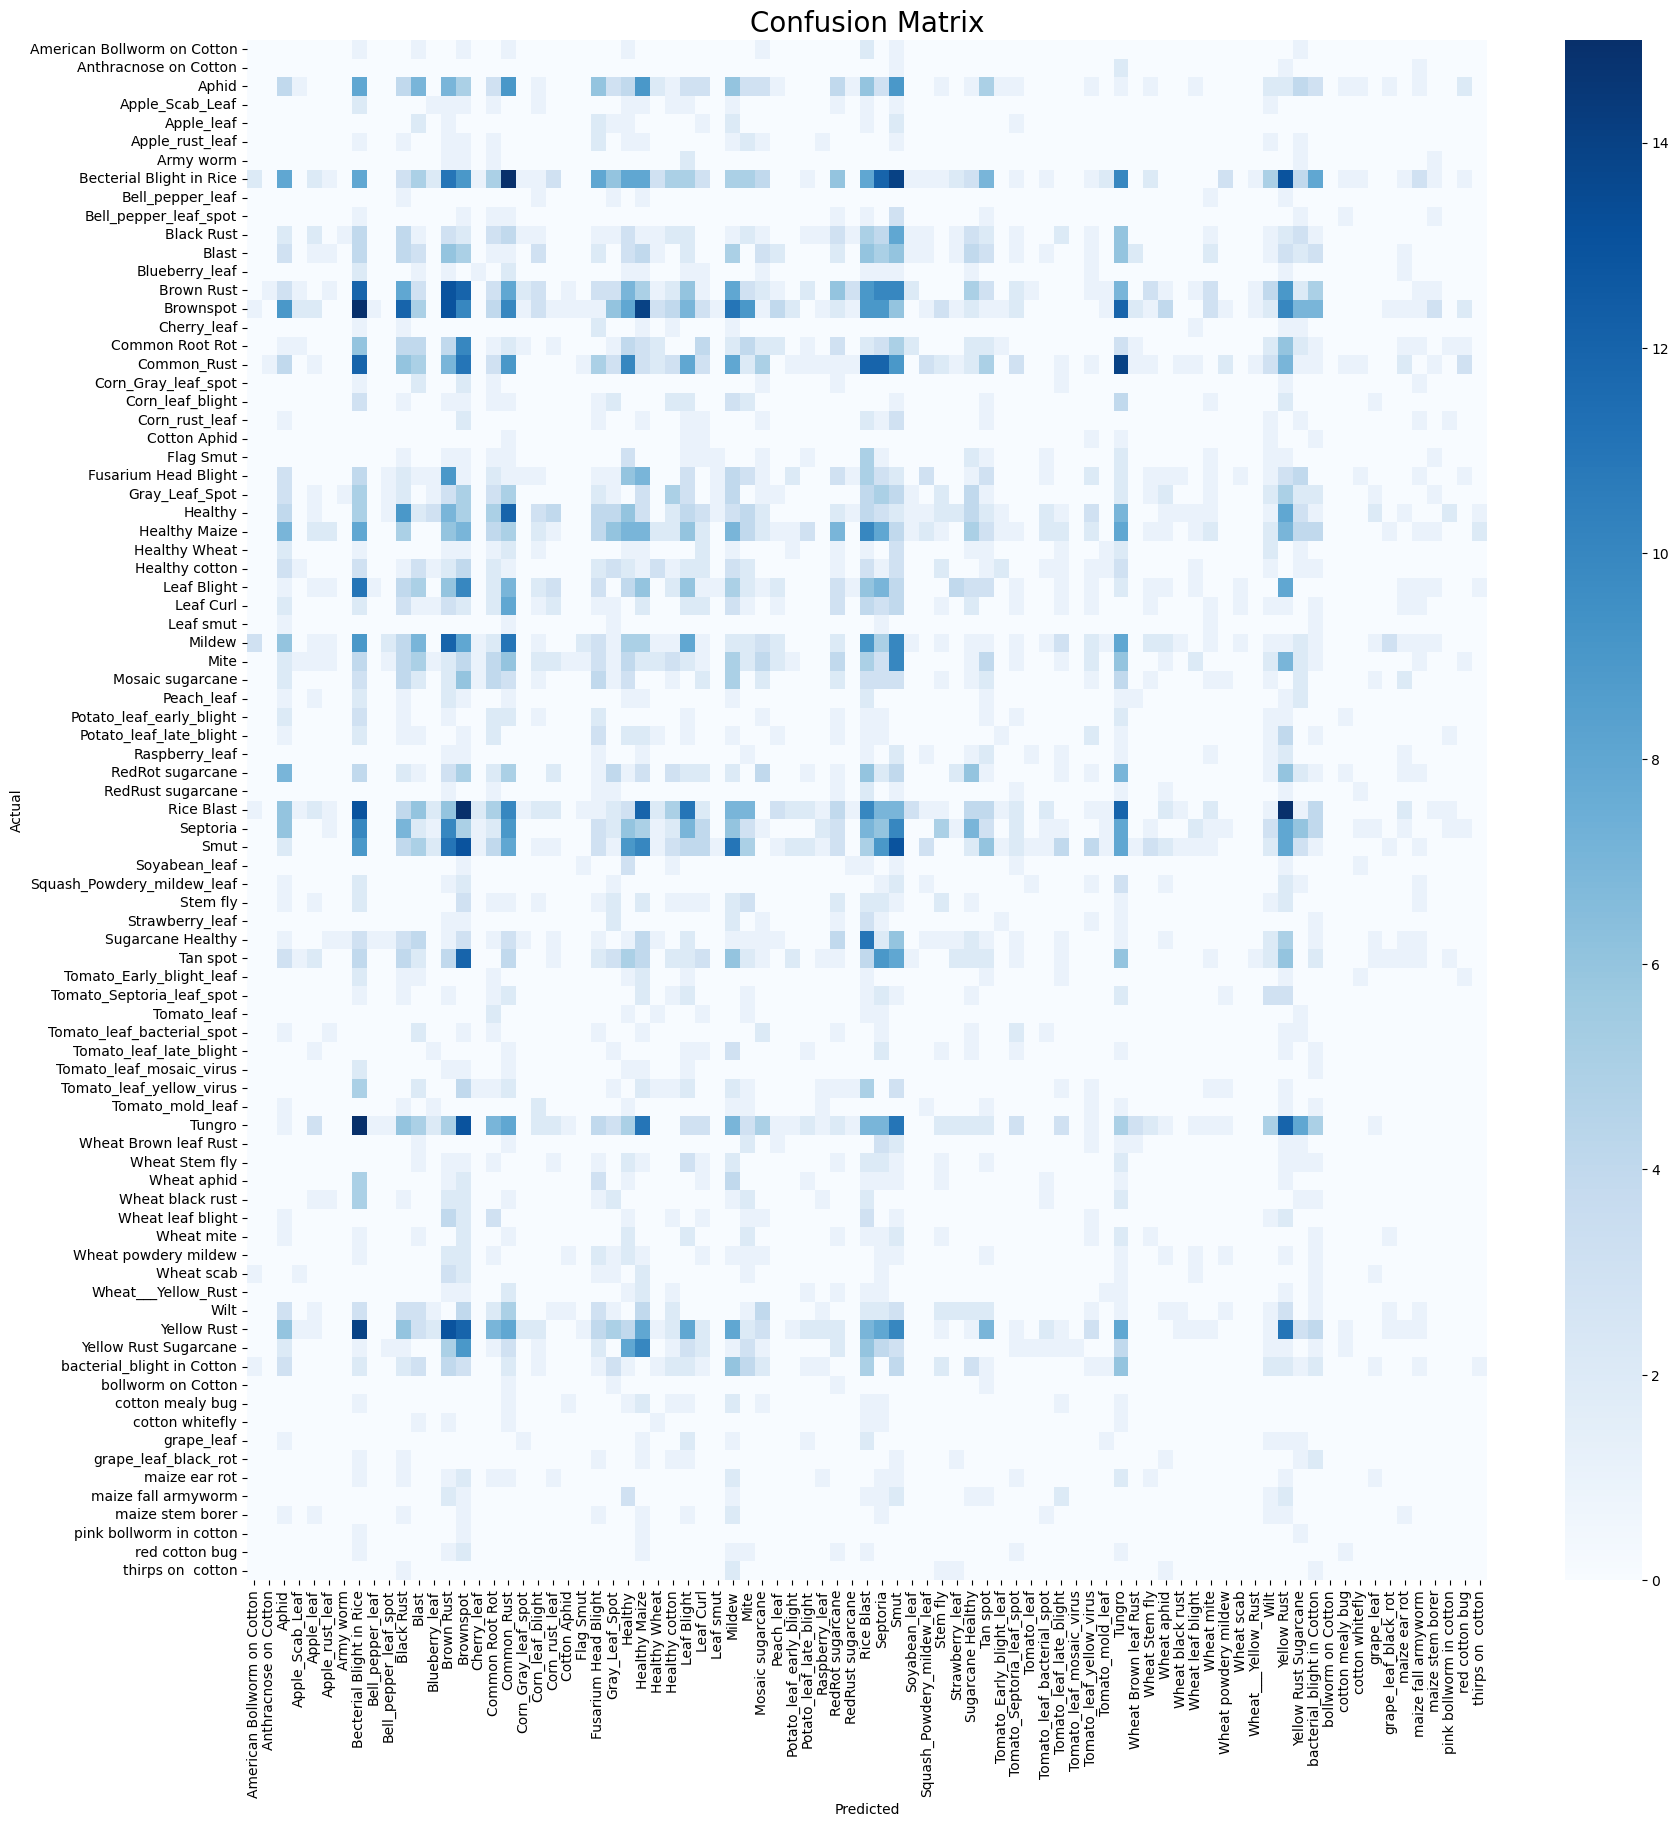

In [5]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load best model
model = load_model("mobilenetv2_best.h5")

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

# Predictions
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

# Classification report
class_labels = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
import numpy as np

print("Step 1: All libraries imported successfully.")


Step 1: All libraries imported successfully.


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with heavy augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Validation data generator (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Use the preprocessed_dataset folders
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\train",
    target_size=(224,224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\val",
    target_size=(224,224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

print("Step 2: Data generators ready with preprocessed_dataset.")


Found 27241 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.
Step 2: Data generators ready with preprocessed_dataset.


In [20]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights to handle imbalance
classes = train_generator.classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(classes), y=classes)
class_weights_dict = dict(enumerate(class_weights))

print("Step 3: Class weights calculated.")
print(class_weights_dict)


Step 3: Class weights calculated.
{0: 6.353202282815473, 1: 15.088855421686747, 2: 0.4162442874948068, 3: 3.9577325696227534, 4: 4.311101549053356, 5: 3.714179796107507, 6: 8.622203098106713, 7: 0.23998179597116098, 8: 11.496270797475617, 9: 4.733758563666431, 10: 0.6596220949371255, 11: 0.5748135398737808, 12: 3.1766011414077364, 13: 0.29334348328917126, 14: 0.23036420491124804, 15: 6.190299660179178, 16: 0.6096507241085555, 17: 0.28912776855926703, 18: 5.614457831325301, 19: 2.0118473895582327, 20: 3.1766011414077364, 21: 9.656867469879518, 22: 2.117734094271824, 23: 0.6174467691738822, 24: 0.6632463921620548, 25: 0.38320902658252054, 26: 0.32275626570452937, 27: 2.1364751039556458, 28: 0.9179531815474827, 29: 0.4349940301747531, 30: 0.890854932645712, 31: 10.059236947791165, 32: 0.3571326727026449, 33: 0.4678714859437751, 34: 0.8128676321447406, 35: 3.1766011414077364, 36: 2.321362372567192, 37: 1.8570898980537536, 38: 3.1766011414077364, 39: 0.6222208421314123, 40: 4.92697319891812

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf

# Load MobileNetV2 without top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers except last 20
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary to verify
model.summary()
print("Step 4: MobileNetV2 loaded and ready for training.")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,654,803 (13.94 MB)

 Trainable params: 2,602,899 (9.93 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

Step 4: MobileNetV2 loaded and ready for training.


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 5: Model Checkpoint
checkpoint = ModelCheckpoint(
    r"C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

# Step 6: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # Increase later if needed
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)

print("Step 6: Model training completed.")


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 20/627 ━━━━━━━━━━━━━━━━━━━━ 11:33 1s/step - accuracy: 0.0105 - loss: 4.7534

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0313 - loss: 4.4255
Epoch 1: val_accuracy improved from -inf to 0.20677, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 868s 1s/step - accuracy: 0.0314 - loss: 4.4252 - val_accuracy: 0.2068 - val_loss: 3.7339
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2602 - loss: 3.6495
Epoch 2: val_accuracy improved from 0.20677 to 0.36601, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 2640s 4s/step - accuracy: 0.2603 - loss: 3.6493 - val_accuracy: 0.3660 - val_loss: 2.9867
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3878 - loss: 2.9811
Epoch 3: val_accuracy improved from 0.36601 to 0.43533, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 947s 2s/step - accuracy: 0.3878 - loss: 2.9808 - val_accuracy: 0.4353 - val_loss: 2.4460
Epoch 4/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4495 - loss: 2.4266
Epoch 4: val_accuracy improved from 0.43533 to 0.47376, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 952s 2s/step - accuracy: 0.4495 - loss: 2.4264 - val_accuracy: 0.4738 - val_loss: 2.1311
Epoch 5/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4823 - loss: 2.0690
Epoch 5: val_accuracy improved from 0.47376 to 0.50584, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.4823 - loss: 2.0690 - val_accuracy: 0.5058 - val_loss: 1.9141
Epoch 6/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5204 - loss: 1.8668
Epoch 6: val_accuracy improved from 0.50584 to 0.53218, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.5204 - loss: 1.8668 - val_accuracy: 0.5322 - val_loss: 1.7473
Epoch 7/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5421 - loss: 1.7306
Epoch 7: val_accuracy improved from 0.53218 to 0.54704, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1119s 2s/step - accuracy: 0.5421 - loss: 1.7306 - val_accuracy: 0.5470 - val_loss: 1.6631
Epoch 8/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5568 - loss: 1.6350
Epoch 8: val_accuracy improved from 0.54704 to 0.56090, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 798s 1s/step - accuracy: 0.5568 - loss: 1.6350 - val_accuracy: 0.5609 - val_loss: 1.5766
Epoch 9/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5751 - loss: 1.5092
Epoch 9: val_accuracy improved from 0.56090 to 0.56684, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 795s 1s/step - accuracy: 0.5751 - loss: 1.5093 - val_accuracy: 0.5668 - val_loss: 1.5290
Epoch 10/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5877 - loss: 1.4233
Epoch 10: val_accuracy improved from 0.56684 to 0.57536, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 813s 1s/step - accuracy: 0.5877 - loss: 1.4233 - val_accuracy: 0.5754 - val_loss: 1.4727
Epoch 11/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5956 - loss: 1.3939
Epoch 11: val_accuracy improved from 0.57536 to 0.58427, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 947s 2s/step - accuracy: 0.5956 - loss: 1.3939 - val_accuracy: 0.5843 - val_loss: 1.4421
Epoch 12/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6059 - loss: 1.3564
Epoch 12: val_accuracy improved from 0.58427 to 0.58705, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1038s 2s/step - accuracy: 0.6059 - loss: 1.3563 - val_accuracy: 0.5870 - val_loss: 1.4156
Epoch 13/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6134 - loss: 1.2588 
Epoch 13: val_accuracy improved from 0.58705 to 0.59913, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 6561s 10s/step - accuracy: 0.6134 - loss: 1.2588 - val_accuracy: 0.5991 - val_loss: 1.3711
Epoch 14/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6239 - loss: 1.2345
Epoch 14: val_accuracy improved from 0.59913 to 0.60606, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 826s 1s/step - accuracy: 0.6239 - loss: 1.2345 - val_accuracy: 0.6061 - val_loss: 1.3457
Epoch 15/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6248 - loss: 1.1738
Epoch 15: val_accuracy improved from 0.60606 to 0.61180, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1120s 2s/step - accuracy: 0.6248 - loss: 1.1738 - val_accuracy: 0.6118 - val_loss: 1.3194
Epoch 16/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6382 - loss: 1.1131
Epoch 16: val_accuracy improved from 0.61180 to 0.62527, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 5796s 9s/step - accuracy: 0.6382 - loss: 1.1132 - val_accuracy: 0.6253 - val_loss: 1.2832
Epoch 17/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6467 - loss: 1.1014
Epoch 17: val_accuracy improved from 0.62527 to 0.62587, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 954s 2s/step - accuracy: 0.6467 - loss: 1.1014 - val_accuracy: 0.6259 - val_loss: 1.2682
Epoch 18/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6559 - loss: 1.0716
Epoch 18: val_accuracy improved from 0.62587 to 0.63161, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 963s 2s/step - accuracy: 0.6559 - loss: 1.0716 - val_accuracy: 0.6316 - val_loss: 1.2517
Epoch 19/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6509 - loss: 1.0631
Epoch 19: val_accuracy improved from 0.63161 to 0.63854, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1664s 3s/step - accuracy: 0.6509 - loss: 1.0631 - val_accuracy: 0.6385 - val_loss: 1.2228
Epoch 20/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6623 - loss: 1.0091
Epoch 20: val_accuracy did not improve from 0.63854
627/627 ━━━━━━━━━━━━━━━━━━━━ 972s 2s/step - accuracy: 0.6623 - loss: 1.0091 - val_accuracy: 0.6336 - val_loss: 1.2382
Epoch 21/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6654 - loss: 0.9757
Epoch 21: val_accuracy improved from 0.63854 to 0.64468, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 2112s 3s/step - accuracy: 0.6654 - loss: 0.9757 - val_accuracy: 0.6447 - val_loss: 1.1991
Epoch 22/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6640 - loss: 0.9727
Epoch 22: val_accuracy did not improve from 0.64468
627/627 ━━━━━━━━━━━━━━━━━━━━ 3510s 6s/step - accuracy: 0.6640 - loss: 0.9727 - val_accuracy: 0.6447 - val_loss: 1.1993
Epoch 23/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6695 - loss: 0.9577
Epoch 23: val_accuracy improved from 0.64468 to 0.65003, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 1118s 2s/step - accuracy: 0.6695 - loss: 0.9577 - val_accuracy: 0.6500 - val_loss: 1.1955
Epoch 24/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 58s/step - accuracy: 0.6782 - loss: 0.9306 
Epoch 24: val_accuracy did not improve from 0.65003
627/627 ━━━━━━━━━━━━━━━━━━━━ 36317s 58s/step - accuracy: 0.6782 - loss: 0.9306 - val_accuracy: 0.6484 - val_loss: 1.1922
Epoch 25/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6791 - loss: 0.8850
Epoch 25: val_accuracy improved from 0.65003 to 0.65973, saving model to C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 926s 1s/step - accuracy: 0.6791 - loss: 0.8850 - val_accuracy: 0.6597 - val_loss: 1.1648
Epoch 26/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6891 - loss: 0.8945
Epoch 26: val_accuracy did not improve from 0.65973
627/627 ━━━━━━━━━━━━━━━━━━━━ 943s 2s/step - accuracy: 0.6891 - loss: 0.8944 - val_accuracy: 0.6532 - val_loss: 1.1696
Epoch 27/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6920 - loss: 0.8770
Epoch 27: val_accuracy did not improve from 0.65973
627/627 ━━━━━━━━━━━━━━━━━━━━ 935s 1s/step - accuracy: 0.6920 - loss: 0.8770 - val_accuracy: 0.6580 - val_loss: 1.1538
Epoch 28/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6900 - loss: 0.8556
Epoch 28: val_accuracy did not improve from 0.65973
627/627 ━━━━━━━━━━━━━━━━━━━━ 924s 1s/step - accuracy: 0.6900 - loss: 0.8556 - val_accuracy: 0.6595 - val_loss: 1.1408
Epoch 29/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 28s/step - accuracy: 0.7016 - loss: 0.8205 
Epoch 29: val_accuracy imp

627/627 ━━━━━━━━━━━━━━━━━━━━ 17759s 28s/step - accuracy: 0.7016 - loss: 0.8205 - val_accuracy: 0.6621 - val_loss: 1.1429
Epoch 30/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7057 - loss: 0.7969
Epoch 30: val_accuracy did not improve from 0.66211
627/627 ━━━━━━━━━━━━━━━━━━━━ 2572s 4s/step - accuracy: 0.7056 - loss: 0.7969 - val_accuracy: 0.6601 - val_loss: 1.1436
Step 6: Model training completed.


In [23]:
# Step 7: Evaluate the trained MobileNetV2 model on Test set
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to best saved model
model_path = r"C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5"

# Load best model
model = load_model(model_path)
print("✅ Best trained model loaded from:", model_path)

# Test data generator (same rescaling as training/validation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\Test"

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("📊 Test Accuracy:", round(test_accuracy*100, 2), "%")
print("📉 Test Loss:", round(test_loss, 4))


✅ Best trained model loaded from: C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5
Found 6271 images belonging to 83 classes.
196/196 ━━━━━━━━━━━━━━━━━━━━ 152s 763ms/step - accuracy: 0.6509 - loss: 1.2066
📊 Test Accuracy: 66.54 %
📉 Test Loss: 1.1097


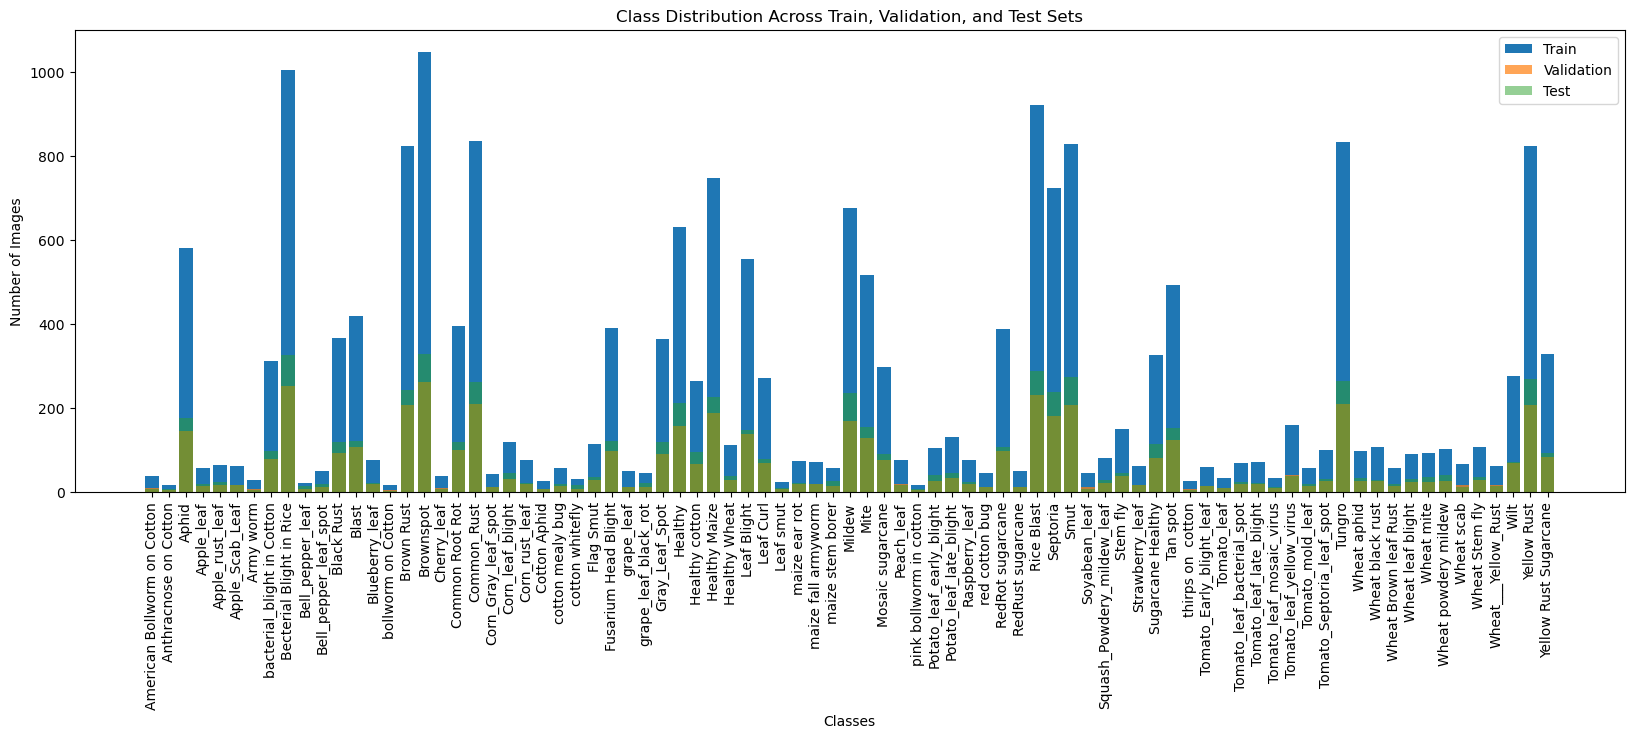

In [24]:
import os
import matplotlib.pyplot as plt

# Paths
train_path = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\train"
val_path = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\val"
test_path = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\test"

def get_class_distribution(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_dir = os.path.join(path, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Get distributions
train_counts = get_class_distribution(train_path)
val_counts = get_class_distribution(val_path)
test_counts = get_class_distribution(test_path)

# Plot
plt.figure(figsize=(20,6))
plt.bar(train_counts.keys(), train_counts.values(), label="Train")
plt.bar(val_counts.keys(), val_counts.values(), alpha=0.7, label="Validation")
plt.bar(test_counts.keys(), test_counts.values(), alpha=0.5, label="Test")
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution Across Train, Validation, and Test Sets")
plt.legend()
plt.show()



In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get true labels and predictions from test set
test_labels = test_generator.classes
class_indices = {v: k for k, v in test_generator.class_indices.items()}  # index-to-class mapping

# Predict
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Classification report
print("\n📊 Classification Report (Precision, Recall, F1 per class):\n")
print(classification_report(test_labels, y_pred, target_names=[class_indices[i] for i in range(len(class_indices))]))





196/196 ━━━━━━━━━━━━━━━━━━━━ 138s 695ms/step

📊 Classification Report (Precision, Recall, F1 per class):

                             precision    recall  f1-score   support

American Bollworm on Cotton       0.19      0.50      0.28         8
      Anthracnose on Cotton       0.00      0.00      0.00         8
                      Aphid       0.79      0.28      0.42       177
            Apple_Scab_Leaf       0.31      0.31      0.31        16
                 Apple_leaf       0.75      0.67      0.71        18
            Apple_rust_leaf       0.52      0.58      0.55        24
                  Army worm       0.62      1.00      0.77         5
   Becterial Blight in Rice       0.91      0.83      0.87       326
           Bell_pepper_leaf       0.69      0.60      0.64        15
      Bell_pepper_leaf_spot       0.34      0.63      0.44        19
                 Black Rust       0.48      0.42      0.45       118
                      Blast       0.59      0.88      0.71       

In [26]:
from tensorflow.keras.models import load_model

# Load best trained model
model_path = r"C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_best.h5"
model = load_model(model_path)

print("Model loaded successfully.")


Model loaded successfully.


In [27]:
# Unfreeze last 50 layers of MobileNetV2 for fine-tuning
for layer in model.layers[:-50]:
    layer.trainable = False
for layer in model.layers[-50:]:
    layer.trainable = True

print("Last 50 layers unfrozen for fine-tuning.")


Last 50 layers unfrozen for fine-tuning.


In [28]:
from tensorflow.keras.optimizers import Adam

# Small learning rate for fine-tuning
optimizer = Adam(learning_rate=1e-4)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled for fine-tuning.")


Model compiled for fine-tuning.


In [37]:
# -------------------------
# Step 5: Fine-tune MobileNetV2
# -------------------------

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Paths (adjust if needed)
train_path = '../preprocessed_dataset/train'
val_path   = '../preprocessed_dataset/val'

# -------------------------
# 1. Data generators
# -------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',   # <--- integer labels
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# -------------------------
# 2. Load best MobileNetV2
# -------------------------
model = load_model('../models/mobilenetv2_best.h5')
print("✅ Best trained MobileNetV2 loaded.")

# -------------------------
# 3. Compile model for sparse labels
# -------------------------
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',  # <--- fixed mismatch
    metrics=['accuracy']
)

# -------------------------
# 4. Compute class weights (if not already)
# -------------------------
from sklearn.utils.class_weight import compute_class_weight

# Get labels from train generator
train_labels = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))
print("Class weights computed.")

# -------------------------
# 5. Callbacks
# -------------------------
checkpoint = ModelCheckpoint(
    '../models/mobilenetv2_finetuned.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# -------------------------
# 6. Fine-tune
# -------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,                  # increase if GPU allows
    class_weight=class_weights, # handles imbalance
    callbacks=[checkpoint, earlystop]
)

# -------------------------
# 7. Done
# -------------------------
print("✅ Fine-tuning completed. Best model saved at '../models/mobilenetv2_finetuned.h5'")


Found 20038 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


✅ Best trained MobileNetV2 loaded.
Class weights computed.
Epoch 1/20
 13/627 ━━━━━━━━━━━━━━━━━━━━ 10:38 1s/step - accuracy: 0.7456 - loss: 0.6942

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6732 - loss: 1.0604 
Epoch 1: val_accuracy improved from -inf to 0.61755, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 7021s 11s/step - accuracy: 0.6732 - loss: 1.0605 - val_accuracy: 0.6175 - val_loss: 1.4131
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6917 - loss: 0.9092
Epoch 2: val_accuracy improved from 0.61755 to 0.65795, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 793s 1s/step - accuracy: 0.6917 - loss: 0.9092 - val_accuracy: 0.6580 - val_loss: 1.2807
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7243 - loss: 0.7657
Epoch 3: val_accuracy improved from 0.65795 to 0.66528, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 791s 1s/step - accuracy: 0.7243 - loss: 0.7658 - val_accuracy: 0.6653 - val_loss: 1.1894
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7385 - loss: 0.6751
Epoch 4: val_accuracy improved from 0.66528 to 0.67637, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 821s 1s/step - accuracy: 0.7385 - loss: 0.6751 - val_accuracy: 0.6764 - val_loss: 1.1914
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7599 - loss: 0.5796
Epoch 5: val_accuracy improved from 0.67637 to 0.69558, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 809s 1s/step - accuracy: 0.7599 - loss: 0.5796 - val_accuracy: 0.6956 - val_loss: 1.1334
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7721 - loss: 0.5359
Epoch 6: val_accuracy did not improve from 0.69558
627/627 ━━━━━━━━━━━━━━━━━━━━ 2861s 5s/step - accuracy: 0.7721 - loss: 0.5360 - val_accuracy: 0.6774 - val_loss: 1.2526
Epoch 7/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7799 - loss: 0.5205
Epoch 7: val_accuracy improved from 0.69558 to 0.69816, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 792s 1s/step - accuracy: 0.7799 - loss: 0.5205 - val_accuracy: 0.6982 - val_loss: 1.1493
Epoch 8/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7963 - loss: 0.4792
Epoch 8: val_accuracy did not improve from 0.69816
627/627 ━━━━━━━━━━━━━━━━━━━━ 804s 1s/step - accuracy: 0.7963 - loss: 0.4792 - val_accuracy: 0.6746 - val_loss: 1.3123
Epoch 9/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7924 - loss: 0.4425
Epoch 9: val_accuracy improved from 0.69816 to 0.71717, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 945s 2s/step - accuracy: 0.7924 - loss: 0.4426 - val_accuracy: 0.7172 - val_loss: 1.0809
Epoch 10/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8047 - loss: 0.4241
Epoch 10: val_accuracy did not improve from 0.71717
627/627 ━━━━━━━━━━━━━━━━━━━━ 941s 2s/step - accuracy: 0.8047 - loss: 0.4241 - val_accuracy: 0.7094 - val_loss: 1.1703
Epoch 11/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8104 - loss: 0.4109
Epoch 11: val_accuracy did not improve from 0.71717
627/627 ━━━━━━━━━━━━━━━━━━━━ 954s 2s/step - accuracy: 0.8104 - loss: 0.4109 - val_accuracy: 0.7051 - val_loss: 1.2592
Epoch 12/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8274 - loss: 0.3519
Epoch 12: val_accuracy improved from 0.71717 to 0.72272, saving model to ../models/mobilenetv2_finetuned.h5


627/627 ━━━━━━━━━━━━━━━━━━━━ 930s 1s/step - accuracy: 0.8274 - loss: 0.3520 - val_accuracy: 0.7227 - val_loss: 1.1030
Epoch 13/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8311 - loss: 0.3409
Epoch 13: val_accuracy did not improve from 0.72272
627/627 ━━━━━━━━━━━━━━━━━━━━ 921s 1s/step - accuracy: 0.8311 - loss: 0.3409 - val_accuracy: 0.7148 - val_loss: 1.1546
Epoch 14/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8293 - loss: 0.3399
Epoch 14: val_accuracy did not improve from 0.72272
627/627 ━━━━━━━━━━━━━━━━━━━━ 1463s 2s/step - accuracy: 0.8293 - loss: 0.3400 - val_accuracy: 0.7221 - val_loss: 1.1362
Epoch 15/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8374 - loss: 0.3387
Epoch 15: val_accuracy did not improve from 0.72272
627/627 ━━━━━━━━━━━━━━━━━━━━ 1076s 2s/step - accuracy: 0.8374 - loss: 0.3388 - val_accuracy: 0.7003 - val_loss: 1.3380
Epoch 16/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8369 - loss: 0.3432
Epoch 16: val_accuracy did

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Reload the best saved fine-tuned model
model = load_model('../models/mobilenetv2_finetuned.h5')

# 2. Prepare test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../preprocessed_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# 3. Evaluate accuracy & loss
test_loss, test_acc = model.evaluate(test_generator)
print(f"📊 Test Accuracy: {test_acc*100:.2f} %")
print(f"📉 Test Loss: {test_loss:.4f}")

# 4. Predictions
y_pred = model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# 5. True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 6. Classification Report
print("\n📑 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# 7. Confusion Matrix (Optional)
cm = confusion_matrix(y_true, y_pred_classes)
print("✅ Confusion Matrix generated")


Found 6271 images belonging to 83 classes.


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 144s 721ms/step - accuracy: 0.7144 - loss: 1.1745
📊 Test Accuracy: 72.91 %
📉 Test Loss: 1.1003
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 712ms/step

📑 Classification Report:
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.31      0.50      0.38         8
      Anthracnose on Cotton       0.00      0.00      0.00         8
                      Aphid       0.77      0.45      0.57       177
            Apple_Scab_Leaf       0.43      0.56      0.49        16
                 Apple_leaf       0.68      0.72      0.70        18
            Apple_rust_leaf       0.55      0.71      0.62        24
                  Army worm       0.71      1.00      0.83         5
   Becterial Blight in Rice       1.00      0.85      0.92       326
           Bell_pepper_leaf       0.86      0.80      0.83        15
      Bell_pepper_leaf_spot       0.43      0.16      0.23        19
                 Black Rust       0.60      0

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# --------------------------
# 1. Path setup
# --------------------------
train_dir = "../preprocessed_dataset/train"   # adjust if needed
target_min = 200   # minimum number of images per class

# --------------------------
# 2. Define augmentation generator
# --------------------------
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode="nearest"
)

# --------------------------
# 3. Augment underrepresented classes
# --------------------------
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('png','jpg','jpeg'))]
    n_images = len(images)
    
    if n_images < target_min:
        print(f"⚡ Augmenting class: {class_name} (had {n_images}, need {target_min})")
        img_index = 0
        while len(os.listdir(class_path)) < target_min:
            img_file = images[img_index % n_images]
            img_path = os.path.join(class_path, img_file)
            
            # Load and prepare image
            img = load_img(img_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)
            
            # Generate 1 augmented image and save
            aug_iter = datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix="aug", save_format="jpg")
            next(aug_iter)
            
            img_index += 1

print("✅ Augmentation complete! All classes now have at least", target_min, "images.")


⚡ Augmenting class: cotton mealy bug (had 199, need 200)
✅ Augmentation complete! All classes now have at least 200 images.


In [3]:
target_min = 200

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('png','jpg','jpeg'))]
    n_images = len(images)
    
    if n_images >= target_min:
        print(f"✅ {class_name} already has {n_images} images, skipping.")
        continue
    
    print(f"⚡ Resuming augmentation: {class_name} (had {n_images}, need {target_min})")
    img_index = 0
    while len(os.listdir(class_path)) < target_min:
        img_file = images[img_index % n_images]
        img_path = os.path.join(class_path, img_file)

        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        aug_iter = datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix="aug", save_format="jpg")
        next(aug_iter)
        img_index += 1

print("🎉 Augmentation fully completed!")


✅ American Bollworm on Cotton already has 200 images, skipping.
✅ Anthracnose on Cotton already has 200 images, skipping.
✅ Aphid already has 580 images, skipping.
✅ Apple_leaf already has 200 images, skipping.
✅ Apple_rust_leaf already has 200 images, skipping.
✅ Apple_Scab_Leaf already has 200 images, skipping.
✅ Army worm already has 200 images, skipping.
✅ bacterial_blight in Cotton already has 312 images, skipping.
✅ Becterial Blight in Rice already has 1006 images, skipping.
✅ Bell_pepper_leaf already has 200 images, skipping.
✅ Bell_pepper_leaf_spot already has 200 images, skipping.
✅ Black Rust already has 366 images, skipping.
✅ Blast already has 420 images, skipping.
✅ Blueberry_leaf already has 200 images, skipping.
✅ bollworm on Cotton already has 200 images, skipping.
✅ Brown Rust already has 823 images, skipping.
✅ Brownspot already has 1048 images, skipping.
✅ Cherry_leaf already has 200 images, skipping.
✅ Common Root Rot already has 396 images, skipping.
✅ Common_Rust 

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# -----------------------------
# 1. Paths & parameters
# -----------------------------
train_dir = "../preprocessed_dataset/train"
val_dir = "../preprocessed_dataset/val"   # make sure you have validation set
img_size = (224, 224)
batch_size = 32
epochs = 20
learning_rate = 1e-4

# -----------------------------
# 2. Data generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# -----------------------------
# 3. Compute class weights
# -----------------------------
classes = list(train_generator.class_indices.keys())
y_train_classes = train_generator.classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_classes), y=y_train_classes)
class_weights_dict = dict(zip(np.arange(len(classes)), class_weights))
print("Class weights:", class_weights_dict)

# -----------------------------
# 4. Build MobileNetV2 model
# -----------------------------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Optional: Freeze base model layers for initial training
for layer in base_model.layers:
    layer.trainable = True   # fine-tune all layers since dataset is small and balanced

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# -----------------------------
# 5. Callbacks
# -----------------------------
checkpoint = ModelCheckpoint('../models/mobilenetv2_balanced_best.h5', monitor='val_accuracy', 
                             save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# -----------------------------
# 6. Train
# -----------------------------
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[checkpoint, earlystop],
    verbose=1
)


Found 27241 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.
Class weights: {0: 1.6410240963855423, 1: 1.6410240963855423, 2: 0.5658703780639801, 3: 1.6410240963855423, 4: 1.6410240963855423, 5: 1.6410240963855423, 6: 1.6410240963855423, 7: 0.32624733526551536, 8: 1.6410240963855423, 9: 1.6410240963855423, 10: 0.8967344788992033, 11: 0.7814400458978772, 12: 1.6410240963855423, 13: 0.3987907889150771, 14: 0.3131725374781569, 15: 1.6410240963855423, 16: 0.8288000486795668, 17: 0.3930596638049203, 18: 1.6410240963855423, 19: 1.6410240963855423, 20: 1.6410240963855423, 21: 1.6410240963855423, 22: 1.6410240963855423, 23: 0.8393985147752134, 24: 0.9016615914206275, 25: 0.5209600305985849, 26: 0.4387764963597706, 27: 1.6410240963855423, 28: 1.2479270694947089, 29: 0.5913600347335287, 30: 1.2110878940114702, 31: 1.6410240963855423, 32: 0.4855100876880302, 33: 0.6360558513122256, 34: 1.1050667315727556, 35: 1.6410240963855423, 36: 1.6410240963855423, 37: 1.641024096385

C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
682/852 ━━━━━━━━━━━━━━━━━━━━ 9:02 3s/step - accuracy: 0.2767 - loss: 3.2306

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3109 - loss: 3.0381
Epoch 1: val_accuracy improved from -inf to 0.53535, saving model to ../models/mobilenetv2_balanced_best.h5


852/852 ━━━━━━━━━━━━━━━━━━━━ 2794s 3s/step - accuracy: 0.3111 - loss: 3.0370 - val_accuracy: 0.5354 - val_loss: 1.6647
Epoch 2/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6779 - loss: 1.0781 
Epoch 2: val_accuracy improved from 0.53535 to 0.59636, saving model to ../models/mobilenetv2_balanced_best.h5


852/852 ━━━━━━━━━━━━━━━━━━━━ 9038s 11s/step - accuracy: 0.6779 - loss: 1.0780 - val_accuracy: 0.5964 - val_loss: 1.4245
Epoch 3/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7438 - loss: 0.7615
Epoch 3: val_accuracy improved from 0.59636 to 0.69578, saving model to ../models/mobilenetv2_balanced_best.h5


852/852 ━━━━━━━━━━━━━━━━━━━━ 4943s 6s/step - accuracy: 0.7438 - loss: 0.7614 - val_accuracy: 0.6958 - val_loss: 1.0379
Epoch 4/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7974 - loss: 0.5765
Epoch 4: val_accuracy improved from 0.69578 to 0.73381, saving model to ../models/mobilenetv2_balanced_best.h5


852/852 ━━━━━━━━━━━━━━━━━━━━ 2380s 3s/step - accuracy: 0.7974 - loss: 0.5765 - val_accuracy: 0.7338 - val_loss: 0.8869
Epoch 5/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8195 - loss: 0.4801
Epoch 5: val_accuracy improved from 0.73381 to 0.74054, saving model to ../models/mobilenetv2_balanced_best.h5


852/852 ━━━━━━━━━━━━━━━━━━━━ 4715s 6s/step - accuracy: 0.8195 - loss: 0.4801 - val_accuracy: 0.7405 - val_loss: 0.8892
Epoch 6/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 39s/step - accuracy: 0.8417 - loss: 0.4096 
Epoch 6: val_accuracy improved from 0.74054 to 0.75144, saving model to ../models/mobilenetv2_balanced_best.h5


852/852 ━━━━━━━━━━━━━━━━━━━━ 33217s 39s/step - accuracy: 0.8417 - loss: 0.4096 - val_accuracy: 0.7514 - val_loss: 0.8438
Epoch 7/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.8526 - loss: 0.3653 
Epoch 7: val_accuracy improved from 0.75144 to 0.75698, saving model to ../models/mobilenetv2_balanced_best.h5


852/852 ━━━━━━━━━━━━━━━━━━━━ 22675s 27s/step - accuracy: 0.8526 - loss: 0.3653 - val_accuracy: 0.7570 - val_loss: 0.8062
Epoch 8/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 116s/step - accuracy: 0.8606 - loss: 0.3343  

In [1]:
from tensorflow.keras.models import load_model

# Load the best checkpoint
model = load_model("../models/mobilenetv2_balanced_best.h5")

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --------------------------
# Validation generator
# --------------------------
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '../preprocessed_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# --------------------------
# Test generator
# --------------------------
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../preprocessed_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5049 images belonging to 83 classes.
Found 6271 images belonging to 83 classes.


In [4]:
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"Validation Accuracy: {val_acc:.2%}, Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2%}, Loss: {test_loss:.4f}")


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 115s 710ms/step - accuracy: 0.7613 - loss: 0.7870
196/196 ━━━━━━━━━━━━━━━━━━━━ 144s 734ms/step - accuracy: 0.7665 - loss: 0.8077
Validation Accuracy: 75.70%, Loss: 0.8062
Test Accuracy: 76.22%, Loss: 0.7817


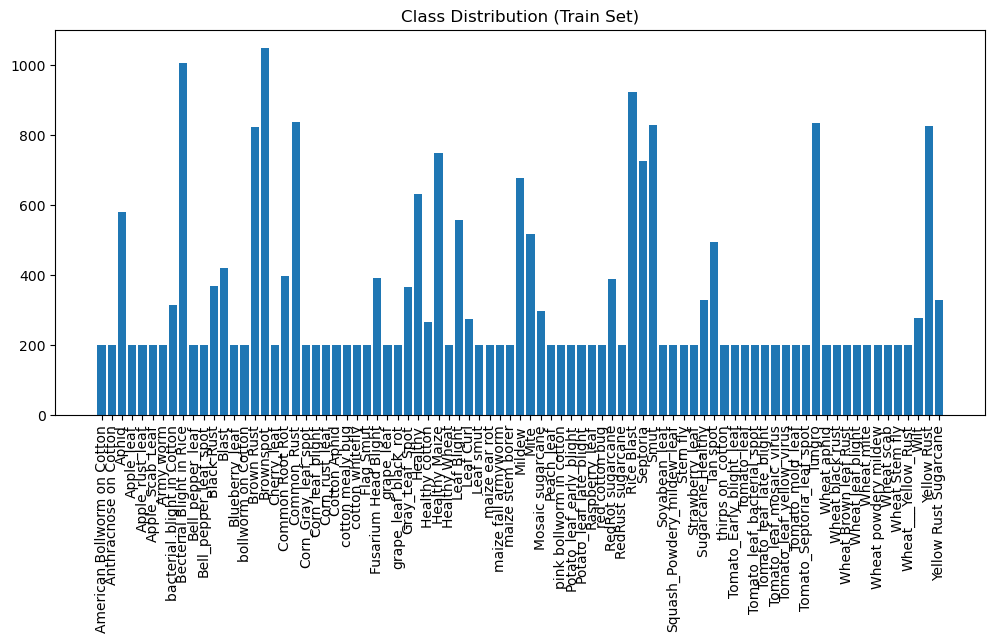

Class counts: {'American Bollworm on Cotton': 200, 'Anthracnose on Cotton': 200, 'Aphid': 580, 'Apple_leaf': 200, 'Apple_rust_leaf': 200, 'Apple_Scab_Leaf': 200, 'Army worm': 200, 'bacterial_blight in Cotton': 312, 'Becterial Blight in Rice': 1006, 'Bell_pepper_leaf': 200, 'Bell_pepper_leaf_spot': 200, 'Black Rust': 366, 'Blast': 420, 'Blueberry_leaf': 200, 'bollworm on Cotton': 200, 'Brown Rust': 823, 'Brownspot': 1048, 'Cherry_leaf': 200, 'Common Root Rot': 396, 'Common_Rust': 835, 'Corn_Gray_leaf_spot': 200, 'Corn_leaf_blight': 200, 'Corn_rust_leaf': 200, 'Cotton Aphid': 200, 'cotton mealy bug': 200, 'cotton whitefly': 200, 'Flag Smut': 200, 'Fusarium Head Blight': 391, 'grape_leaf': 200, 'grape_leaf_black_rot': 200, 'Gray_Leaf_Spot': 364, 'Healthy': 630, 'Healthy cotton': 264, 'Healthy Maize': 748, 'Healthy Wheat': 200, 'Leaf Blight': 555, 'Leaf Curl': 272, 'Leaf smut': 200, 'maize ear rot': 200, 'maize fall armyworm': 200, 'maize stem borer': 200, 'Mildew': 676, 'Mite': 516, 'Mosa

In [5]:
import os
import matplotlib.pyplot as plt

train_dir = "../preprocessed_dataset/train"

class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) 
                for cls in os.listdir(train_dir)}

# Plot
plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Class Distribution (Train Set)")
plt.show()

print("Class counts:", class_counts)


158/158 ━━━━━━━━━━━━━━━━━━━━ 114s 711ms/step
Classification Report:
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.43      0.30      0.35        10
      Anthracnose on Cotton       0.00      0.00      0.00         5
                      Aphid       0.82      0.52      0.64       146
            Apple_Scab_Leaf       0.46      0.38      0.41        16
                 Apple_leaf       0.74      1.00      0.85        14
            Apple_rust_leaf       0.93      0.76      0.84        17
                  Army worm       0.60      0.43      0.50         7
   Becterial Blight in Rice       0.96      0.99      0.98       252
           Bell_pepper_leaf       0.80      0.67      0.73         6
      Bell_pepper_leaf_spot       0.62      0.62      0.62        13
                 Black Rust       0.45      0.63      0.52        92
                      Blast       0.70      0.90      0.79       106
             Blueberry_leaf       

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


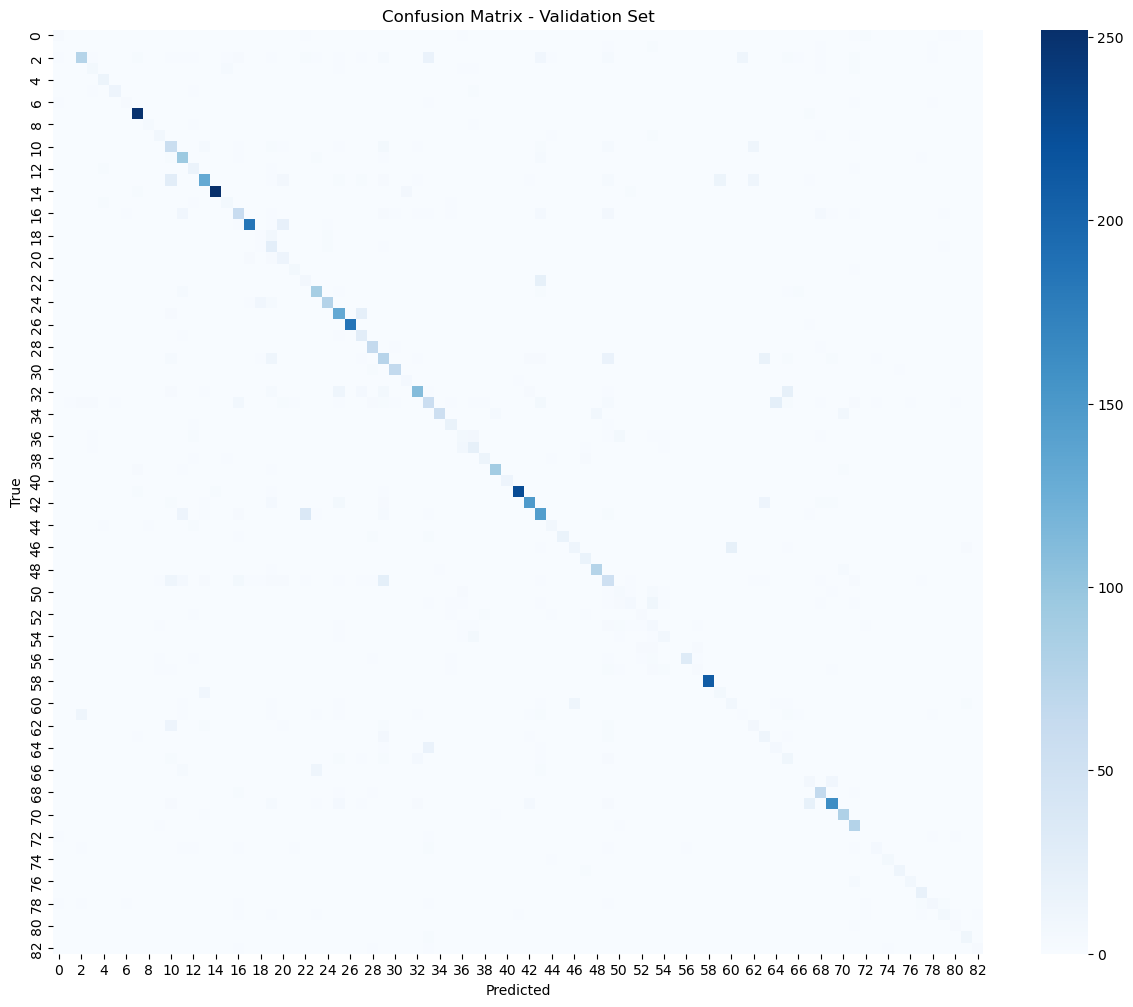

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on validation data
Y_pred = model.predict(val_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(val_generator.classes, y_pred)

import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Custom Categorical Focal Loss
def categorical_focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss for multi-class classification
    gamma: focusing parameter (higher -> focus more on hard examples)
    alpha: balancing factor for rare classes
    """
    def focal_loss(y_true, y_pred):
        # Clip values to prevent NaN & log(0)
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        
        # Cross entropy
        ce = -y_true * K.log(y_pred)
        
        # Weight by (1 - p)^gamma
        weight = alpha * K.pow((1 - y_pred), gamma)
        
        # Final focal loss
        fl = weight * ce
        return K.sum(fl, axis=1)
    return focal_loss


In [12]:
from tensorflow.keras.models import load_model

# Load your best checkpoint till now
model = load_model("../models/mobilenetv2_balanced_best.h5", compile=False)

# Compile with Focal Loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # smaller LR for fine-tuning
    loss=categorical_focal_loss(gamma=2., alpha=0.25),
    metrics=["accuracy"]
)

print("✅ Model recompiled with Focal Loss!")


✅ Model recompiled with Focal Loss!


In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Extract class indices and labels
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

# Get labels from training generator
train_labels = train_generator.classes  

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_labels),
    y=train_labels
)

# Convert to dictionary
class_weights_dict = {i : w for i, w in enumerate(class_weights)}

print("✅ Class Weights Calculated:")
print(class_weights_dict)


✅ Class Weights Calculated:
{0: 1.6410240963855423, 1: 1.6410240963855423, 2: 0.5658703780639801, 3: 1.6410240963855423, 4: 1.6410240963855423, 5: 1.6410240963855423, 6: 1.6410240963855423, 7: 0.32624733526551536, 8: 1.6410240963855423, 9: 1.6410240963855423, 10: 0.8967344788992033, 11: 0.7814400458978772, 12: 1.6410240963855423, 13: 0.3987907889150771, 14: 0.3131725374781569, 15: 1.6410240963855423, 16: 0.8288000486795668, 17: 0.3930596638049203, 18: 1.6410240963855423, 19: 1.6410240963855423, 20: 1.6410240963855423, 21: 1.6410240963855423, 22: 1.6410240963855423, 23: 0.8393985147752134, 24: 0.9016615914206275, 25: 0.5209600305985849, 26: 0.4387764963597706, 27: 1.6410240963855423, 28: 1.2479270694947089, 29: 0.5913600347335287, 30: 1.2110878940114702, 31: 1.6410240963855423, 32: 0.4855100876880302, 33: 0.6360558513122256, 34: 1.1050667315727556, 35: 1.6410240963855423, 36: 1.6410240963855423, 37: 1.6410240963855423, 38: 1.6410240963855423, 39: 0.8458887094770836, 40: 1.64102409638554

In [3]:
# -----------------------------
# Step 1: Define Generators
# -----------------------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "../preprocessed_dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"   # ✅ one-hot encoded labels
)

val_generator = val_datagen.flow_from_directory(
    "../preprocessed_dataset/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"   # ✅ one-hot encoded labels
)

# -----------------------------
# Step 2: Focal Loss Function
# -----------------------------
import tensorflow as tf

def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)
        return tf.reduce_mean(tf.reduce_sum(weight * cross_entropy, axis=-1))
    return loss

# -----------------------------
# Step 3: Recompile Model
# -----------------------------
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=focal_loss(),
    metrics=["accuracy"]
)

print("✅ Generators fixed (categorical) + Model recompiled with focal loss")


Found 27241 images belonging to 83 classes.
Found 5049 images belonging to 83 classes.
✅ Generators fixed (categorical) + Model recompiled with focal loss


In [23]:
# Step 3: Train model with Focal Loss + Class Weights
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ✅ Step 3: Train with focal loss + class weights + callbacks
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,   # must be dict, not numpy array
    callbacks=[
        ModelCheckpoint("../models/mobilenetv2_focal_best.keras", 
                        save_best_only=True, 
                        monitor="val_accuracy", 
                        mode="max"),
        EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    ]
)


Epoch 1/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2504s 3s/step - accuracy: 0.8649 - loss: 0.0511 - val_accuracy: 0.7790 - val_loss: 0.1389
Epoch 2/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 154068s 181s/step - accuracy: 0.8772 - loss: 0.0435 - val_accuracy: 0.7792 - val_loss: 0.1445
Epoch 3/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2486s 3s/step - accuracy: 0.8853 - loss: 0.0383 - val_accuracy: 0.7704 - val_loss: 0.1513
Epoch 4/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2248s 3s/step - accuracy: 0.8873 - loss: 0.0368 - val_accuracy: 0.8002 - val_loss: 0.1457


✅ Model saved at ../models/mobilenetv2_focal_epoch4.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 128s 810ms/step - accuracy: 0.7743 - loss: 0.1396
196/196 ━━━━━━━━━━━━━━━━━━━━ 165s 840ms/step - accuracy: 0.7988 - loss: 0.1379
Validation Accuracy: 77.90%, Loss: 0.1389
Test Accuracy: 78.86%, Loss: 0.1369
158/158 ━━━━━━━━━━━━━━━━━━━━ 130s 807ms/step

📊 Classification Report (Validation Set):
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.00      0.00      0.00        10
      Anthracnose on Cotton       0.00      0.00      0.00         5
                      Aphid       0.05      0.05      0.05       146
            Apple_Scab_Leaf       0.00      0.00      0.00        16
                 Apple_leaf       0.00      0.00      0.00        14
            Apple_rust_leaf       0.00      0.00      0.00        17
                  Army worm       0.00      0.00      0.00         7
   Becterial Blight in Rice       0.05      0.05      0.05       

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


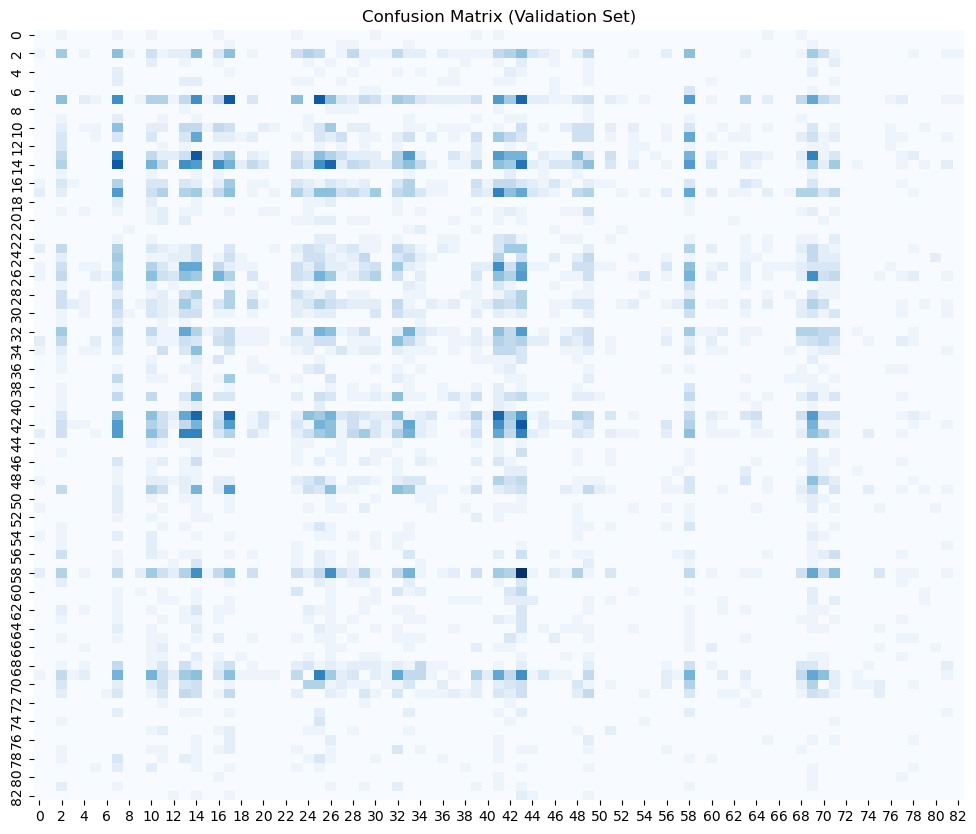

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Save the trained model
model.save("../models/mobilenetv2_focal_epoch4.keras")
print("✅ Model saved at ../models/mobilenetv2_focal_epoch4.keras")

# 2️⃣ Evaluate on validation and test sets
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"Validation Accuracy: {val_acc:.2%}, Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2%}, Loss: {test_loss:.4f}")

# 3️⃣ Predictions for detailed metrics
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator, verbose=1), axis=1)

# Classification Report
print("\n📊 Classification Report (Validation Set):")
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Validation Set)")
plt.show()


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Heavy augmentation for minority classes
minority_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Standard augmentation for all
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [37]:
from sklearn.utils import class_weight
import numpy as np

classes = np.unique(train_generator.classes)
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(weights))


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Make sure focal_loss is defined like this:
def focal_loss(gamma=2., alpha=.25):
    import tensorflow as tf
    def loss(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)
        return tf.reduce_sum(weight * cross_entropy, axis=-1)
    return loss

# Load model without compiling
model = load_model("../models/mobilenetv2_focal_epoch4.keras", compile=False)

# Compile with the focal loss
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=focal_loss(),   # call the function here
    metrics=['accuracy']
)

# Train with class weights and callbacks
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[
        ModelCheckpoint(
            "../models/mobilenetv2_focal_final.keras",
            save_best_only=True,
            monitor="val_accuracy",
            mode="max"
        ),
        EarlyStopping(
            monitor="val_loss",
            patience=3,
            restore_best_weights=True
        )
    ]
)

print("✅ Fine-tuning complete. Model saved at ../models/mobilenetv2_focal_final.keras")


Epoch 1/10
659/852 ━━━━━━━━━━━━━━━━━━━━ 7:46 2s/step - accuracy: 0.8692 - loss: 0.0404

C:\Users\tiwar\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


852/852 ━━━━━━━━━━━━━━━━━━━━ 2296s 3s/step - accuracy: 0.8682 - loss: 0.0409 - val_accuracy: 0.7689 - val_loss: 0.1642
Epoch 2/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2140s 3s/step - accuracy: 0.8774 - loss: 0.0377 - val_accuracy: 0.7699 - val_loss: 0.1486
Epoch 3/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2175s 3s/step - accuracy: 0.8782 - loss: 0.0342 - val_accuracy: 0.7780 - val_loss: 0.1473
Epoch 4/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 4221s 5s/step - accuracy: 0.8828 - loss: 0.0321 - val_accuracy: 0.7568 - val_loss: 0.1698
Epoch 5/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2357s 3s/step - accuracy: 0.8868 - loss: 0.0318 - val_accuracy: 0.7671 - val_loss: 0.1441
Epoch 6/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2158s 3s/step - accuracy: 0.8890 - loss: 0.0286 - val_accuracy: 0.7718 - val_loss: 0.1474
Epoch 7/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 2158s 3s/step - accuracy: 0.8924 - loss: 0.0283 - val_accuracy: 0.7736 - val_loss: 0.1434
Epoch 8/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 31178s 37s/step - accuracy: 0.8948 - loss: 0.0272 - val_accur

✅ Model recompiled & saved at ../models/mobilenetv2_focal_best_epoch8.keras


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 168s 830ms/step - accuracy: 0.7711 - f1_score: 0.7814 - loss: 2.4051 - precision: 0.8333 - recall: 0.7358

📊 Test Accuracy: 77.85%, Loss: 2.2533
✅ Precision: 83.18%, Recall: 74.50%, F1-score: 78.60%
196/196 ━━━━━━━━━━━━━━━━━━━━ 155s 782ms/step

📌 Classification Report (Test Set):

                             precision    recall  f1-score   support

American Bollworm on Cotton       0.40      0.25      0.31         8
      Anthracnose on Cotton       0.00      0.00      0.00         8
                      Aphid       0.73      0.58      0.65       177
            Apple_Scab_Leaf       0.56      0.31      0.40        16
                 Apple_leaf       0.85      0.61      0.71        18
            Apple_rust_leaf       0.93      0.54      0.68        24
                  Army worm       0.80      0.80      0.80         5
   Becterial Blight in Rice       1.00      0.95      0.98       326
           Bell_pepper_leaf       0.75      0.40      0.52        1

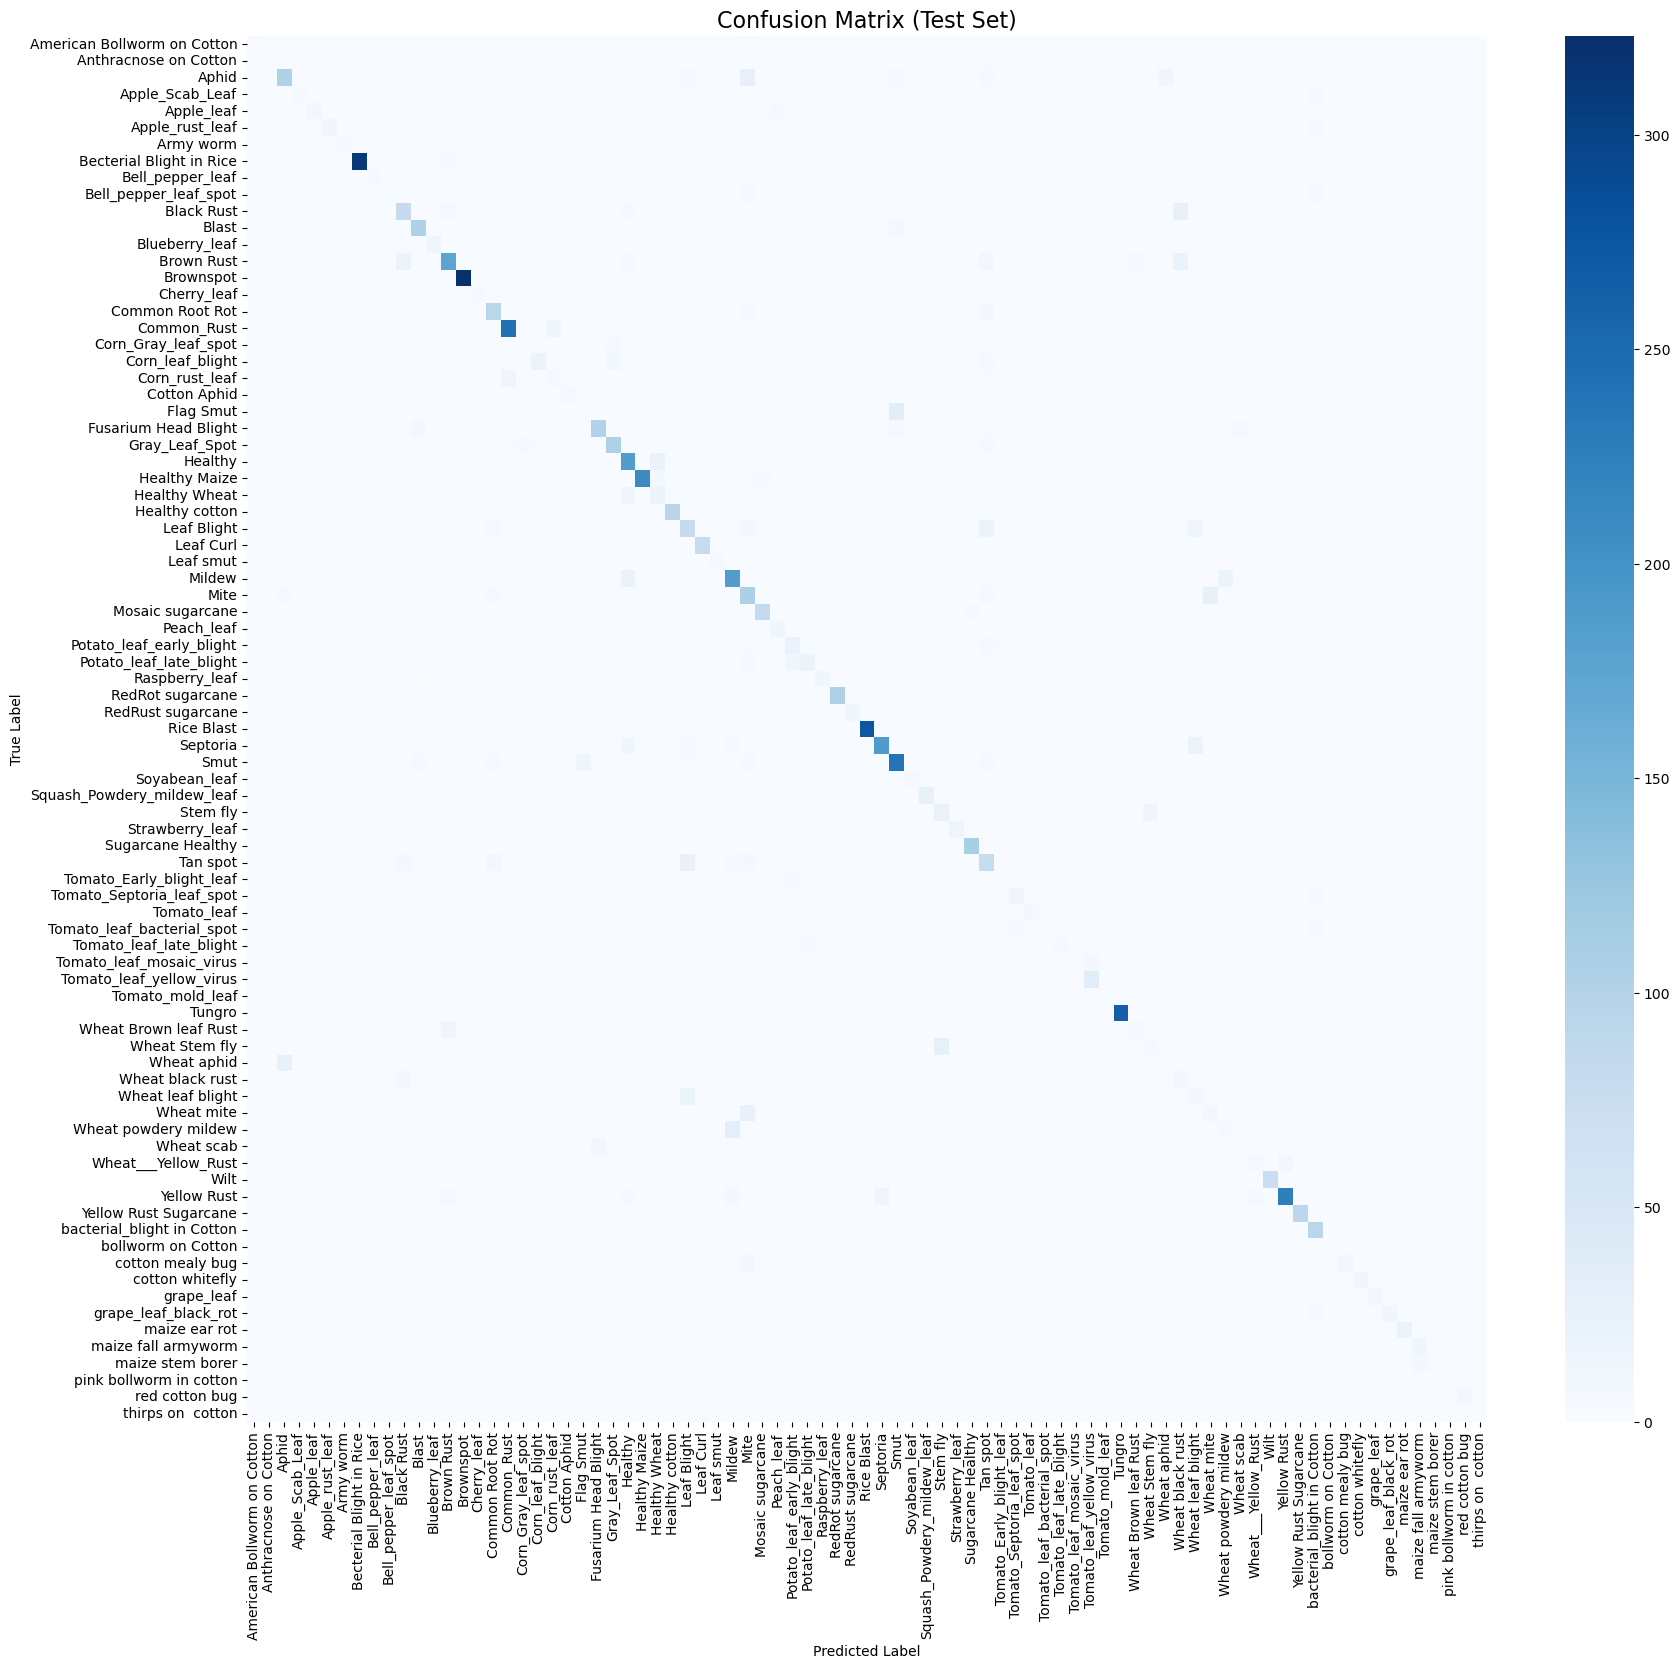

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# ✅ Define focal loss
def focal_loss(gamma=2., alpha=4.):
    def loss(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)
        loss = tf.reduce_sum(weight * cross_entropy, axis=1)
        return tf.reduce_mean(loss)
    return loss

# ✅ Define F1 metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# ✅ Step 1: Load model
model = load_model("../models/mobilenetv2_focal_final.keras", compile=False)

# ✅ Step 2: Compile with additional metrics
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=focal_loss(),
    metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall"), F1Score()]
)

# ✅ Step 3: Save the compiled model
model.save("../models/mobilenetv2_focal_best_epoch8.keras")
print("✅ Model recompiled & saved at ../models/mobilenetv2_focal_best_epoch8.keras")

# ✅ Step 4: Evaluate on test set
test_loss, test_acc, test_precision, test_recall, test_f1 = model.evaluate(test_generator, verbose=1)
print(f"\n📊 Test Accuracy: {test_acc:.2%}, Loss: {test_loss:.4f}")
print(f"✅ Precision: {test_precision:.2%}, Recall: {test_recall:.2%}, F1-score: {test_f1:.2%}")

# ✅ Step 5: Classification Report
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

target_names = list(test_generator.class_indices.keys())

print("\n📌 Classification Report (Test Set):\n")
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

# ✅ Step 6: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 18))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix (Test Set)", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [10]:
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        cross_entropy = -y_true * K.log(y_pred)
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
        return K.sum(loss, axis=1)
    return focal_loss_fixed

model.compile(optimizer=Adam(1e-4), loss=focal_loss(), metrics=["accuracy"])


In [18]:
# ==============================
# ✅ Plant Disease Detection Inference Code
# ==============================

import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# ==============================
# 1️⃣ Define folder paths
# ==============================
main_dir = r"C:\Users\tiwar\plant_disease_detection"
dataset_dir = os.path.join(main_dir, "preprocessed_dataset")  # Correct dataset path
models_dir = os.path.join(main_dir, "models")

train_dir = os.path.join(dataset_dir, "train")
val_dir   = os.path.join(dataset_dir, "val")
test_dir  = os.path.join(dataset_dir, "test")

# Verify directories
for d in [dataset_dir, train_dir, val_dir, test_dir, models_dir]:
    if not os.path.exists(d):
        raise FileNotFoundError(f"Directory not found: {d}")
    else:
        print(f"✅ Found directory: {d}")

# ==============================
# 2️⃣ Load class labels from train folder
# ==============================
class_labels = sorted(os.listdir(train_dir))
print(f"✅ Found {len(class_labels)} classes")

# ==============================
# 3️⃣ Load the best trained model
# ==============================
model_path = os.path.join(models_dir, "mobilenetv2_focal_best_epoch8.keras")  # update if name differs
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

model = load_model(model_path, compile=False)
print("✅ Model loaded for inference")

from tensorflow.keras.optimizers import Adam

# Compile model (placeholder loss for inference)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
print("✅ Model compiled for inference (categorical_crossentropy used as placeholder)")

# ==============================
# 4️⃣ Predict on a single image
# ==============================
def predict_image(img_path):
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"Image not found: {img_path}")

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)
    class_idx = np.argmax(preds, axis=1)[0]
    class_name = class_labels[class_idx]
    confidence = preds[0][class_idx]

    print(f"✅ Predicted class: {class_name} with confidence: {confidence:.2%}")
    return class_name, confidence

# Example usage:
# img_path = os.path.join(test_dir, "Apple_leaf", "sample_image.jpg")
# predict_image(img_path)

# ==============================
# 5️⃣ Predict on test dataset and classification report
# ==============================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Predict
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Classification report
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("\n📌 Classification Report:\n")
print(report)


✅ Found directory: C:\Users\tiwar\plant_disease_detection\preprocessed_dataset
✅ Found directory: C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\train
✅ Found directory: C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\val
✅ Found directory: C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\test
✅ Found directory: C:\Users\tiwar\plant_disease_detection\models
✅ Found 83 classes
✅ Model loaded for inference
✅ Model compiled for inference (categorical_crossentropy used as placeholder)
Found 6271 images belonging to 83 classes.


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 164s 822ms/step

📌 Classification Report:

                             precision    recall  f1-score   support

American Bollworm on Cotton       0.40      0.25      0.31         8
      Anthracnose on Cotton       0.00      0.00      0.00         8
                      Aphid       0.73      0.58      0.65       177
            Apple_Scab_Leaf       0.56      0.31      0.40        16
                 Apple_leaf       0.85      0.61      0.71        18
            Apple_rust_leaf       0.93      0.54      0.68        24
                  Army worm       0.80      0.80      0.80         5
   Becterial Blight in Rice       1.00      0.95      0.98       326
           Bell_pepper_leaf       0.75      0.40      0.52        15
      Bell_pepper_leaf_spot       0.75      0.16      0.26        19
                 Black Rust       0.63      0.68      0.66       118
                      Blast       0.79      0.85      0.82       121
             Blueberry_leaf   

In [21]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_single_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    preds = model.predict(img_array)
    class_idx = np.argmax(preds, axis=1)[0]
    return class_labels[class_idx], preds[0][class_idx]

# Automatically pick the first image in 'Apple_leaf' test folder
test_folder = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\test\Apple_leaf"
first_img = os.listdir(test_folder)[0]
img_path = os.path.join(test_folder, first_img)

pred_class, confidence = predict_single_image(img_path, model, class_labels)
print(f"Prediction: {pred_class} ({confidence*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction: Mite (95.10%)


In [1]:
import os

train_dir = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\train"

# List all class folders
disease_classes = sorted(os.listdir(train_dir))

print(f"Total classes: {len(disease_classes)}")
for d in disease_classes:
    print(d)


Total classes: 83
American Bollworm on Cotton
Anthracnose on Cotton
Aphid
Apple_Scab_Leaf
Apple_leaf
Apple_rust_leaf
Army worm
Becterial Blight in Rice
Bell_pepper_leaf
Bell_pepper_leaf_spot
Black Rust
Blast
Blueberry_leaf
Brown Rust
Brownspot
Cherry_leaf
Common Root Rot
Common_Rust
Corn_Gray_leaf_spot
Corn_leaf_blight
Corn_rust_leaf
Cotton Aphid
Flag Smut
Fusarium Head Blight
Gray_Leaf_Spot
Healthy
Healthy Maize
Healthy Wheat
Healthy cotton
Leaf Blight
Leaf Curl
Leaf smut
Mildew
Mite
Mosaic sugarcane
Peach_leaf
Potato_leaf_early_blight
Potato_leaf_late_blight
Raspberry_leaf
RedRot sugarcane
RedRust sugarcane
Rice Blast
Septoria
Smut
Soyabean_leaf
Squash_Powdery_mildew_leaf
Stem fly
Strawberry_leaf
Sugarcane Healthy
Tan spot
Tomato_Early_blight_leaf
Tomato_Septoria_leaf_spot
Tomato_leaf
Tomato_leaf_bacterial_spot
Tomato_leaf_late_blight
Tomato_leaf_mosaic_virus
Tomato_leaf_yellow_virus
Tomato_mold_leaf
Tungro
Wheat Brown leaf Rust
Wheat Stem fly
Wheat aphid
Wheat black rust
Wheat leaf 

In [3]:
import os, json, numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

# --- Paths (adjust only if your folders differ) ---
ROOT = r"C:\Users\tiwar\plant_disease_detection"
MODEL_PATH   = os.path.join(ROOT, "models", "mobilenetv2_focal_best_epoch8.keras")
MAPPING_PATH = os.path.join(ROOT, "notebook", "disease_mapping.json")
TRAIN_DIR    = os.path.join(ROOT, "preprocessed_dataset", "train")

# --- Load model (inference) ---
model = load_model(MODEL_PATH, compile=False)
model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

# --- Class labels (folder names in train) ---
class_labels = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])

# --- Load disease→treatment mapping ---
with open(MAPPING_PATH, "r", encoding="utf-8") as f:
    dm = json.load(f)
disease_map = dm["diseases"] if "diseases" in dm else dm

def get_treatments(label: str):
    # try exact + simple normalizations
    candidates = [label, label.replace("_", " "), label.replace(" ", "_")]
    for k in candidates:
        if k in disease_map:
            v = disease_map[k]
            if isinstance(v, dict) and "treatment" in v: return v["treatment"]
            if isinstance(v, list): return v
    return ["No treatment guidance found for this label."]

def predict_and_suggest(img_path: str):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, 0)
    probs = model.predict(x, verbose=0)[0]
    idx = int(np.argmax(probs))
    label = class_labels[idx]
    conf = float(probs[idx])
    steps = get_treatments(label)
    print(f"Prediction: {label} ({conf*100:.2f}%)\nSuggested treatment:")
    for i, s in enumerate(steps, 1):
        print(f"{i}. {s}")
    return label, conf, steps

# Example run (change the path to a real test image)
# img_path = r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\test\Mite\xyz.jpg"
# predict_and_suggest(img_path)


In [4]:
img_path =r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\test\Becterial Blight in Rice\BACTERAILBLIGHT3_084.jpg"
predict_and_suggest(img_path)


Prediction: Becterial Blight in Rice (99.58%)
Suggested treatment:
1. Apply Streptomycin with Copper oxychloride.
2. Use resistant rice varieties.
3. Avoid overhead irrigation and maintain field hygiene.


('Becterial Blight in Rice',
 0.9958277344703674,
 ['Apply Streptomycin with Copper oxychloride.',
  'Use resistant rice varieties.',
  'Avoid overhead irrigation and maintain field hygiene.'])

In [5]:
# STEP 1: verify model + save class label order
import os, json, numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report

# absolute path to your models folder
models_dir = r"C:\Users\tiwar\plant_disease_detection\models"
print("models:", os.listdir(models_dir))

# pick your best model file
model_path = os.path.join(models_dir, "mobilenetv2_focal_best_epoch8.keras")
model = load_model(model_path, compile=False)
print("✅ Loaded model:", model_path)

# prepare generator (no shuffling so class indices align)
datagen = ImageDataGenerator(rescale=1./255)
val_gen = datagen.flow_from_directory(
    r"C:\Users\tiwar\plant_disease_detection\preprocessed_dataset\val",  # full path to val folder
    target_size=(224,224),
    batch_size=32,
    shuffle=False
)

# predict
preds = model.predict(val_gen, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

print("Val accuracy (calc):", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))

# Save class label array (index -> label)
class_labels = [None]*len(val_gen.class_indices)
for name, idx in val_gen.class_indices.items():
    class_labels[idx] = name
json.dump(class_labels, open(os.path.join(models_dir,"class_labels.json"), "w"))
print("✅ Saved class_labels.json")


models: ['.ipynb_checkpoints', 'class_labels.json', 'cnn', 'efficientnet', 'mobilenet', 'mobilenetv2_balanced_best.h5', 'mobilenetv2_best.h5', 'mobilenetv2_finetuned.h5', 'mobilenetv2_focal_best.keras', 'mobilenetv2_focal_best_epoch8.keras', 'mobilenetv2_focal_epoch4.keras', 'mobilenetv2_focal_final.keras']
✅ Loaded model: C:\Users\tiwar\plant_disease_detection\models\mobilenetv2_focal_best_epoch8.keras
Found 5049 images belonging to 83 classes.


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 150s 934ms/step
Val accuracy (calc): 0.7839176074470192
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.45      0.50      0.48        10
      Anthracnose on Cotton       0.50      0.20      0.29         5
                      Aphid       0.79      0.60      0.68       146
            Apple_Scab_Leaf       1.00      0.38      0.55        16
                 Apple_leaf       0.71      0.86      0.77        14
            Apple_rust_leaf       0.92      0.71      0.80        17
                  Army worm       0.67      0.29      0.40         7
   Becterial Blight in Rice       1.00      0.96      0.98       252
           Bell_pepper_leaf       0.62      0.83      0.71         6
      Bell_pepper_leaf_spot       0.83      0.38      0.53        13
                 Black Rust       0.52      0.63      0.57        92
                      Blast       0.81      0.83      0.82       106
             Blue

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import json

# Correct paths from notebook folder
class_labels_path = "../models/class_labels.json"
disease_mapping_path = "disease_mapping.json"  # since it's in the same folder

# Load class labels
with open(class_labels_path, "r") as f:
    class_labels = json.load(f)

# Load disease -> treatment mapping
with open(disease_mapping_path, "r") as f:
    disease_treatment = json.load(f)

# Show first 10 class labels
print("Class labels from your model:")
print(class_labels[:10])

# Show all disease mapping keys
print("\nKeys in disease_mapping.json:")
print(list(disease_treatment.keys())[:10])  # first 10 keys for brevity

# Optional: check if all class_labels exist in disease_treatment keys
missing_keys = [cls for cls in class_labels if cls not in disease_treatment]
print("\nClass labels with no treatment mapping:")
print(missing_keys)


Class labels from your model:
['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Aphid', 'Apple_Scab_Leaf', 'Apple_leaf', 'Apple_rust_leaf', 'Army worm', 'Becterial Blight in Rice', 'Bell_pepper_leaf', 'Bell_pepper_leaf_spot']

Keys in disease_mapping.json:
['diseases']

Class labels with no treatment mapping:
['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Aphid', 'Apple_Scab_Leaf', 'Apple_leaf', 'Apple_rust_leaf', 'Army worm', 'Becterial Blight in Rice', 'Bell_pepper_leaf', 'Bell_pepper_leaf_spot', 'Black Rust', 'Blast', 'Blueberry_leaf', 'Brown Rust', 'Brownspot', 'Cherry_leaf', 'Common Root Rot', 'Common_Rust', 'Corn_Gray_leaf_spot', 'Corn_leaf_blight', 'Corn_rust_leaf', 'Cotton Aphid', 'Flag Smut', 'Fusarium Head Blight', 'Gray_Leaf_Spot', 'Healthy', 'Healthy Maize', 'Healthy Wheat', 'Healthy cotton', 'Leaf Blight', 'Leaf Curl', 'Leaf smut', 'Mildew', 'Mite', 'Mosaic sugarcane', 'Peach_leaf', 'Potato_leaf_early_blight', 'Potato_leaf_late_blight', 'Raspberry_leaf',

In [3]:
import json

# Load your disease_mapping.json
with open("../notebook/disease_mapping.json", "r") as f:
    disease_mapping = json.load(f)

# Check the top-level keys
print("Top-level keys in disease_mapping.json:")
print(list(disease_mapping.keys()))

# If it has 'diseases' key, check inside
if "diseases" in disease_mapping:
    print("\nKeys inside 'diseases':")
    print(list(disease_mapping["diseases"].keys())[:20])  # show first 20
    sample = {k: disease_mapping["diseases"][k] for k in list(disease_mapping["diseases"].keys())[:3]}
    print("\nSample entries:", sample)
else:
    # Otherwise, print some sample mappings
    sample = {k: disease_mapping[k] for k in list(disease_mapping.keys())[:3]}
    print("\nSample entries:", sample)


Top-level keys in disease_mapping.json:
['diseases']

Keys inside 'diseases':
['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Aphid', 'Apple_Scab_Leaf', 'Apple_leaf', 'Apple_rust_leaf', 'Army worm', 'Becterial Blight in Rice', 'Bell_pepper_leaf', 'Bell_pepper_leaf_spot', 'Black Rust', 'Blast', 'Blueberry_leaf', 'Brown Rust', 'Brownspot', 'Cherry_leaf', 'Common Root Rot', 'Common_Rust', 'Corn_Gray_leaf_spot', 'Corn_leaf_blight']

Sample entries: {'American Bollworm on Cotton': {'treatment': ['Spray Emamectin benzoate or Spinosad.', 'Install pheromone traps to monitor and reduce population.', 'Avoid excessive nitrogen fertilization.']}, 'Anthracnose on Cotton': {'treatment': ['Apply fungicides like chlorothalonil or mancozeb.', 'Remove and destroy infected plant debris.', 'Practice crop rotation.']}, 'Aphid': {'treatment': ['Spray Imidacloprid or Thiamethoxam.', 'Introduce natural predators like ladybird beetles.', 'Avoid overuse of nitrogen fertilizers.']}}


In [1]:
import os
print(os.getcwd())




C:\Users\tiwar\plant_disease_detection\notebook


In [2]:
import os

# Step 1: Go to project root (one level up from notebook/)
os.chdir(r"C:\Users\tiwar\plant_disease_detection")
print("Now checking in:", os.getcwd())

# Step 2: List of required files
required_files = [
    "app.py",
    "requirements.txt",
    ".gitignore",
    "models/mobilenetv2_focal_best_epoch8.keras",
    "models/class_labels.json",
    "notebook/disease_mapping.json",
    "soil_dataset/models/soil_rf_model.pkl",
    "soil_dataset/models/soil_scaler.pkl",
]

print("\n🔍 Checking required project files and folders...\n")

# Step 3: Check existence
missing = []
for path in required_files:
    if not os.path.exists(path):
        print(f"❌ Missing: {path}")
        missing.append(path)
    else:
        print(f"✅ Found: {path}")

if not missing:
    print("\n🎉 All required files are present and correctly placed!")
else:
    print("\n⚠️ Some required files are missing. Please check paths carefully.")


Now checking in: C:\Users\tiwar\plant_disease_detection

🔍 Checking required project files and folders...

✅ Found: app.py
✅ Found: requirements.txt
✅ Found: .gitignore
✅ Found: models/mobilenetv2_focal_best_epoch8.keras
✅ Found: models/class_labels.json
✅ Found: notebook/disease_mapping.json
✅ Found: soil_dataset/models/soil_rf_model.pkl
✅ Found: soil_dataset/models/soil_scaler.pkl

🎉 All required files are present and correctly placed!
